# Исследовательский анализ  объявлений о продаже квартир


# Описание проекта

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

# Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении


#### Цель исследования  
 * установить параметры, влияющие на рыночную стоимость объектов недвижимости.

#### Исходные данные  
 * данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

#### Основные параметры, которые требуется изучить:

* Сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой
* Какие факторы больше всего влияют на стоимость квартиры
* Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений

### Откройте файл с данными и изучите общую информацию. 

Изучим данные из файла

In [1]:
import pandas as pd   

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore") 

In [6]:
try:
    data = pd.read_csv('/Users/Амина/Downloads/real_estate_data.csv', sep = '\t')
except:    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

In [7]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
print('\nЧисло дубликатов:', data.duplicated().sum())


Число дубликатов: 0


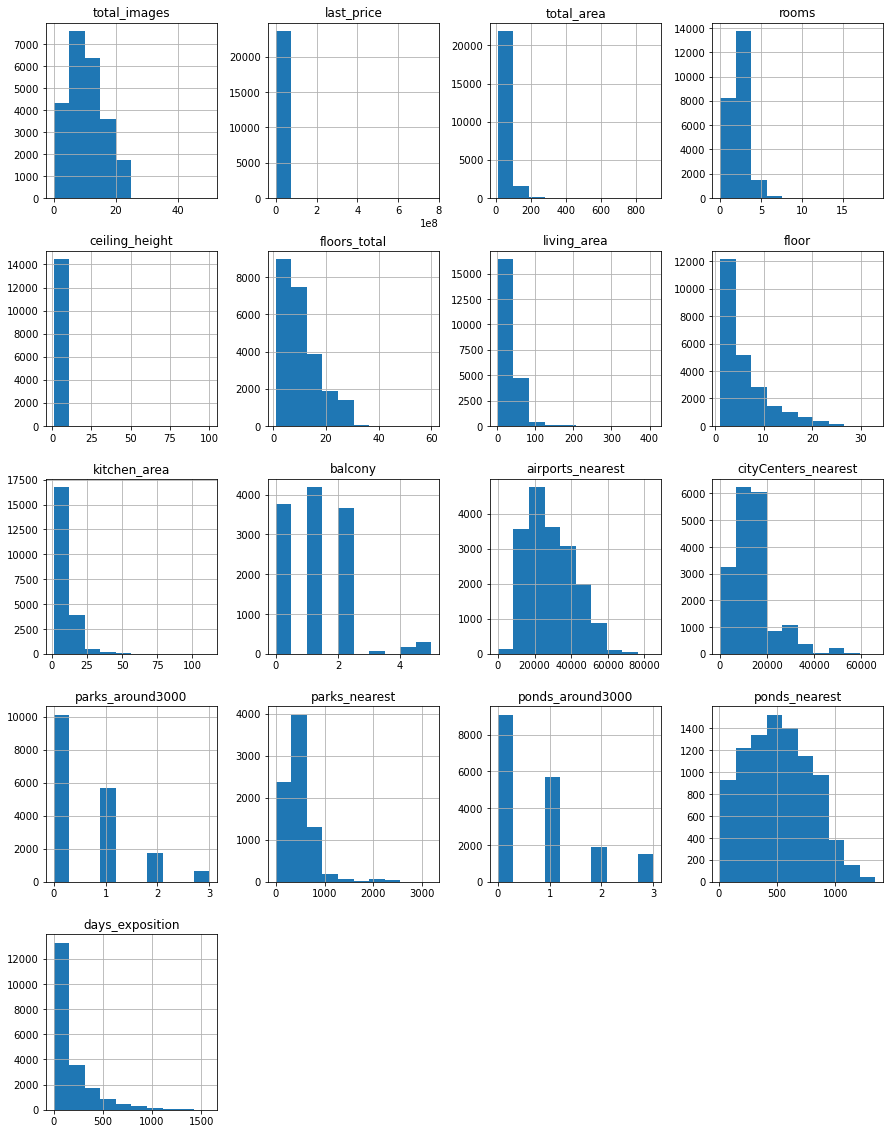

In [10]:
data.hist(figsize=(15,20));

In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


  ### Вывод: 
  ##### В датафрейме 23699 строки, имеются пропуски данных, аномальные значения данных, необходимо изменить типы данных некоторых столбцов на числовые, целочисленные или булевые


In [12]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title(fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось ')

пропусков не осталось 


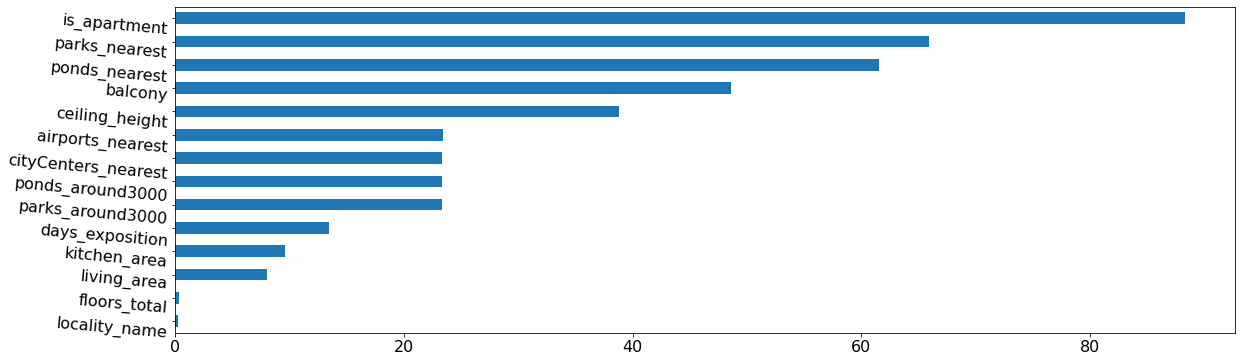

In [13]:
pass_value_barh(data)

### Предобработка данных

In [14]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [15]:
# Смотрим количество пропущенных значений

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
# Приводим в целочисленный тип стоимость квартиры

data['last_price'] = data['last_price'].astype(int)

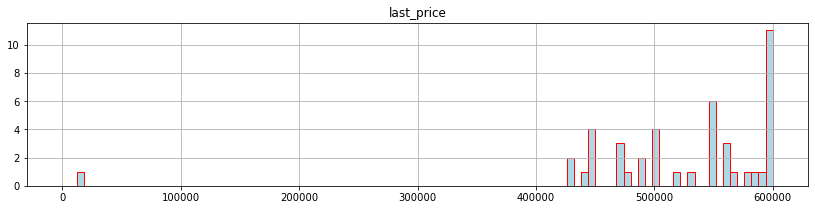

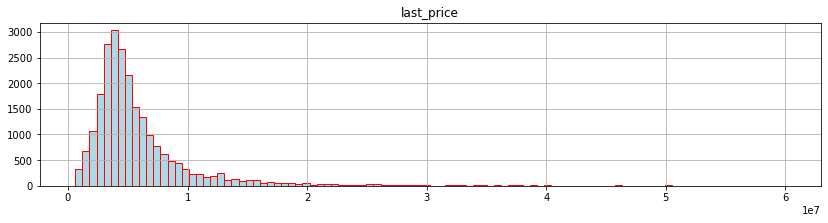

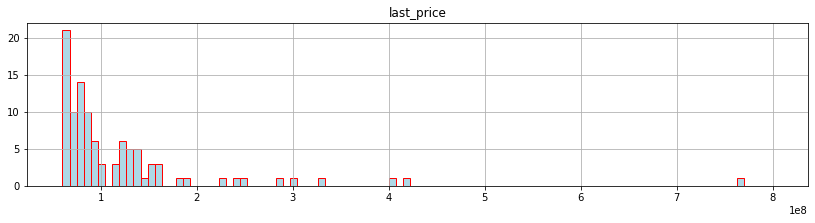

In [17]:
basket = 100
data.hist('last_price', bins=basket, figsize=(14,3), color = "lightblue", ec = "red", range=(0, 600001));
data.hist('last_price', bins=basket, figsize=(14,3), color = "lightblue", ec = "red", range=(600000, 60000001));
data.hist('last_price', bins=basket, figsize=(14,3), color = "lightblue", ec = "red", range=(60000000, 800000000));

Есть выбросы. Избавимся от них, чтобы данные были более равномерные. Оставим все что >400тыс.руб и <100млн.р., остальное удалим.

In [18]:
data = data.loc[(data['last_price']>400000) & (data['last_price']<100000000)]
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['last_price'].describe())

RangeIndex(start=0, stop=23661, step=1)
count    2.366100e+04
mean     6.251771e+06
std      6.424397e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.635000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64


In [19]:
display(data.query('400000 > last_price and last_price < 100000000'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23656,9,9700000,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23657,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23658,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23659,13,11475000,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23660,4,1350000,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


RangeIndex(start=0, stop=23661, step=1)


Удалили строки с сильными выбросами

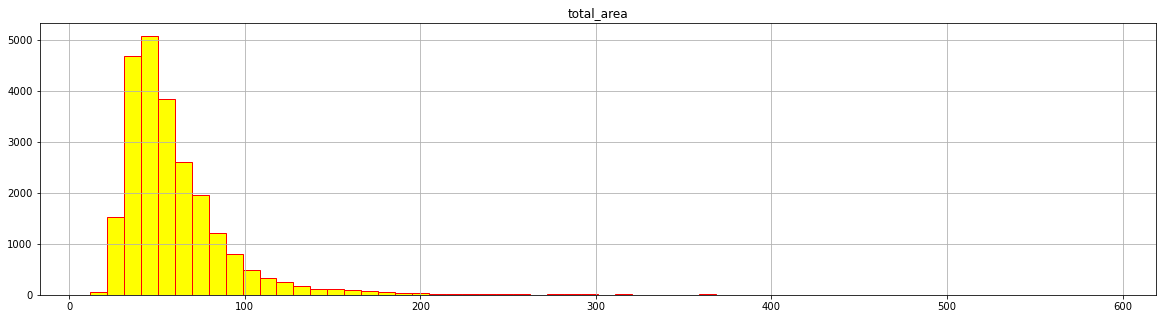

In [20]:
data.hist('total_area', bins=60, figsize=(20,5), color = "yellow", ec = "red", range=(12, 590));

In [21]:
# Приводим в целочисленный тип общая площадь квартиры
data['total_area'] = data['total_area'].astype(int)

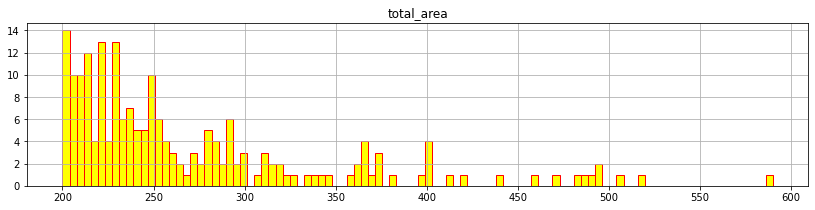

In [22]:
data.hist('total_area', bins=basket, figsize=(14,3), color = "yellow", ec = "red", range=(200, 590));

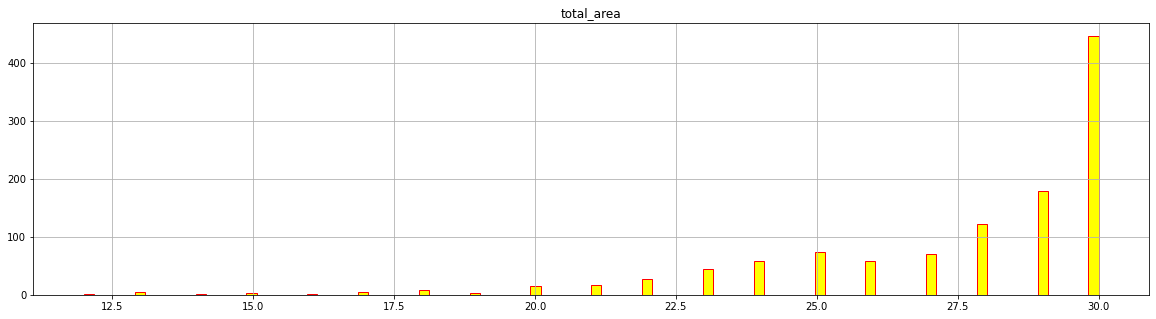

In [23]:
data.hist('total_area', bins=basket, figsize=(20,5), color = "yellow", ec = "red", range=(12, 30));

In [24]:
display(data['total_area'].sort_values().unique())

array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

Отсортируем квартиры от 19 то 250


In [25]:
data = data.loc[(data['total_area']>19) & (data['total_area']<250)]
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['total_area'].describe())

RangeIndex(start=0, stop=23541, step=1)
count    23541.000000
mean        58.685655
std         28.546569
min         20.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.000000
Name: total_area, dtype: float64


In [26]:
display(data.query('19 > total_area and total_area <250'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23536,9,9700000,133,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23537,14,3100000,59,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23538,18,2500000,56,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23539,13,11475000,76,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23540,4,1350000,32,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


RangeIndex(start=0, stop=23541, step=1)


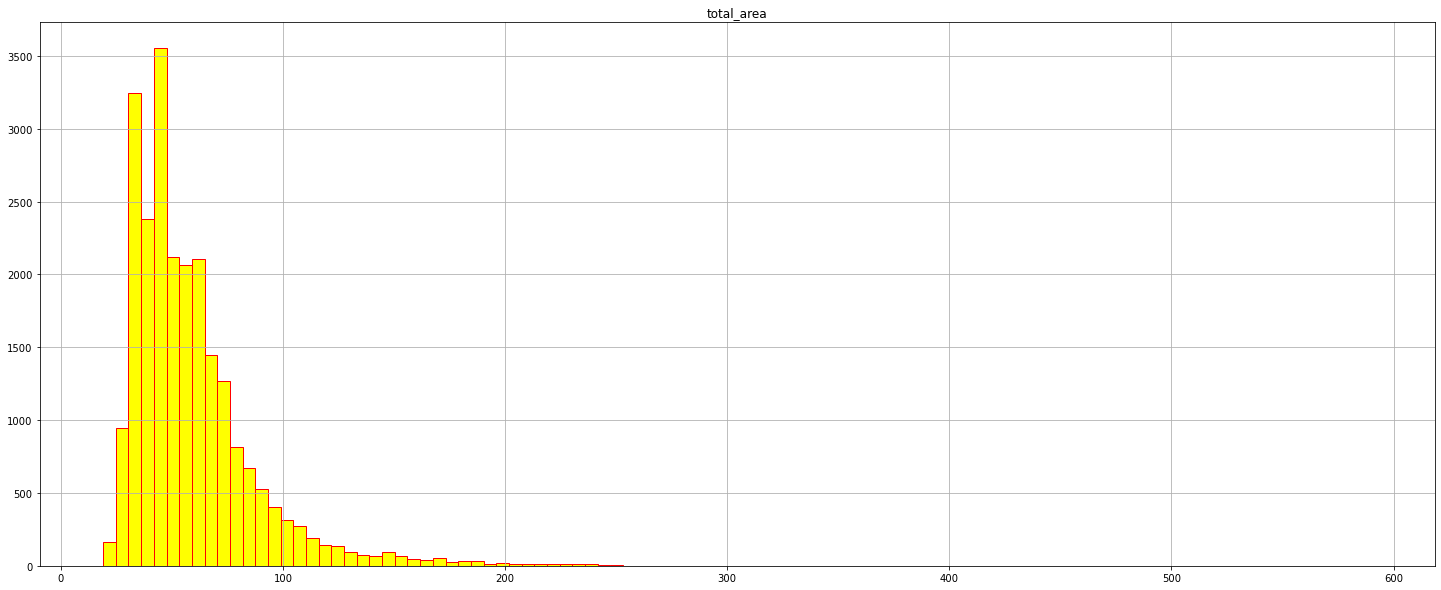

In [27]:
data.hist('total_area', bins=basket, figsize=(25,10), color = "yellow", ec = "red", range=(19, 590));

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14], dtype=int64)

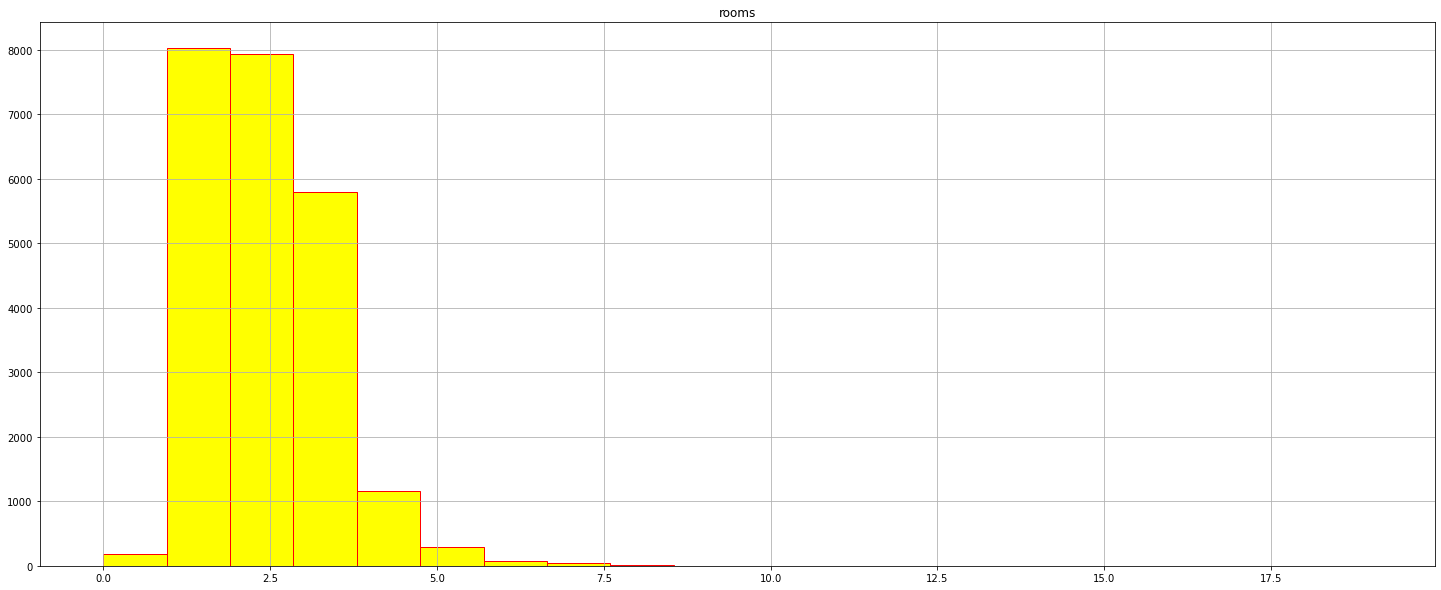

In [28]:
display(data['rooms'].sort_values().unique())
data.hist('rooms', bins=20, figsize=(25,10), color = "yellow", ec = "red", range=(0, 19));

In [29]:
for n in range(1,5):
    print(f'{n} комнатная квартира:',data.query('rooms == @n')['total_area'].describe())
    print()

1 комнатная квартира: count    8027.000000
mean       37.400897
std         7.770682
min        20.000000
25%        32.000000
50%        36.000000
75%        41.000000
max       190.000000
Name: total_area, dtype: float64

2 комнатная квартира: count    7938.000000
mean       55.602671
std        13.098453
min        20.000000
25%        46.000000
50%        53.000000
75%        62.000000
max       196.000000
Name: total_area, dtype: float64

3 комнатная квартира: count    5802.000000
mean       77.196484
std        21.880164
min        40.000000
25%        62.000000
50%        72.000000
75%        86.000000
max       249.000000
Name: total_area, dtype: float64

4 комнатная квартира: count    1163.000000
mean      104.667240
std        36.977528
min        42.000000
25%        77.000000
50%        98.000000
75%       124.000000
max       240.000000
Name: total_area, dtype: float64



In [30]:
data = data.loc[(data['rooms']>=1) & (data['rooms']<6)]
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['rooms'].describe())

RangeIndex(start=0, stop=23221, step=1)
count    23221.000000
mean         2.041945
std          0.952334
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


In [31]:
display(data.query('1 >= rooms and rooms < 6'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000,30,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000,33,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000,39,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23208,8,3300000,31,2017-04-29T00:00:00,1,2.55,9.0,18.00,6,NaN,...,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23209,6,3200000,39,2017-12-16T00:00:00,1,NaN,9.0,20.00,6,NaN,...,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23211,13,3550000,35,2018-02-28T00:00:00,1,2.86,15.0,16.30,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23214,2,1350000,30,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23216,9,9700000,133,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23217,14,3100000,59,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23218,18,2500000,56,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23219,13,11475000,76,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23220,4,1350000,32,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


RangeIndex(start=0, stop=23221, step=1)


array([1, 2, 3, 4, 5], dtype=int64)

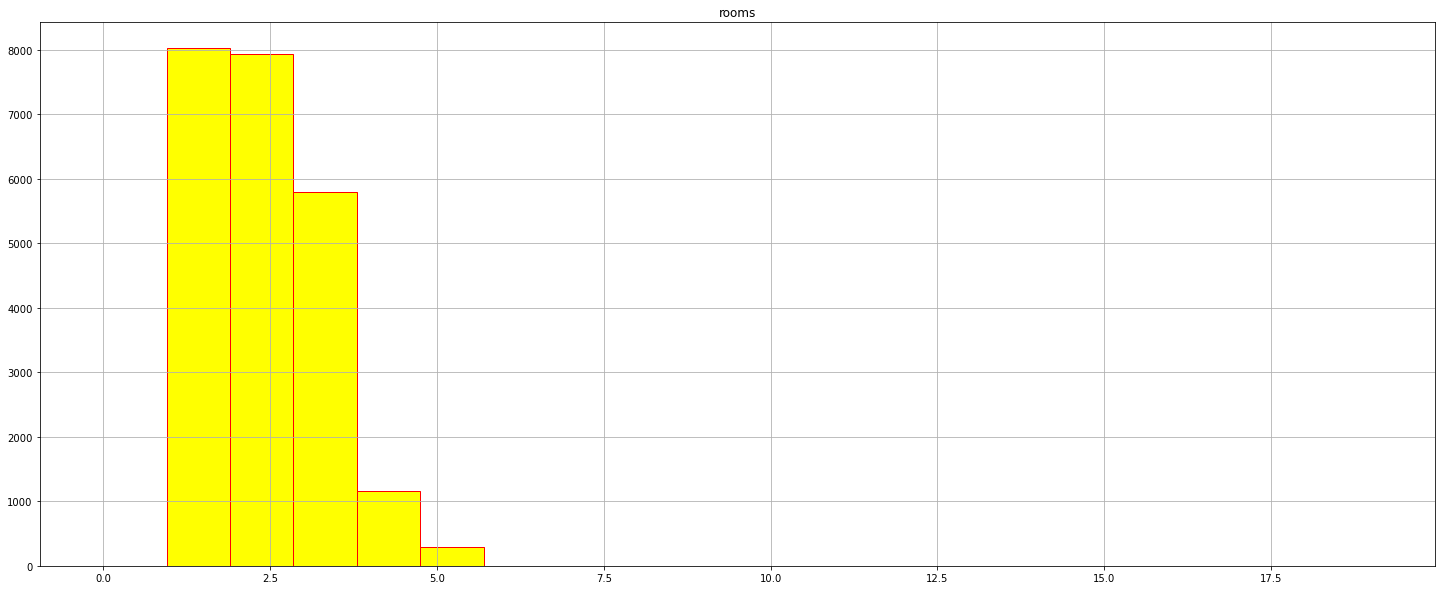

In [32]:
display(data['rooms'].sort_values().unique())
data.hist('rooms', bins=20, figsize=(25,10), color = "yellow", ec = "red", range=(0, 19));

Отсортировали квартиры от 1 до 5 комнат

In [33]:
# Приводим к типу даты дату публикации

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
# Выясняем количество значений в аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на нет

data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [35]:
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0

data['balcony'] = data['balcony'].fillna(value=0).astype(int)

In [36]:
# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0

data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

In [37]:
# Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0

data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

In [38]:
# Смотрим количество пропущенных значений

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8991
floors_total               81
living_area              1855
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2035
balcony                     0
locality_name              49
airports_nearest         5451
cityCenters_nearest      5430
parks_around3000            0
parks_nearest           15351
ponds_around3000            0
ponds_nearest           14365
days_exposition          3098
dtype: int64

In [39]:
#Удаляем записи, где отсутствует локация и этажность

data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

In [40]:
# Приводим этажность к целочисленному типу

data['floors_total'] = data['floors_total'].astype(int)

In [41]:
display(data['floors_total'].sort_values().unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37,
       52, 60])

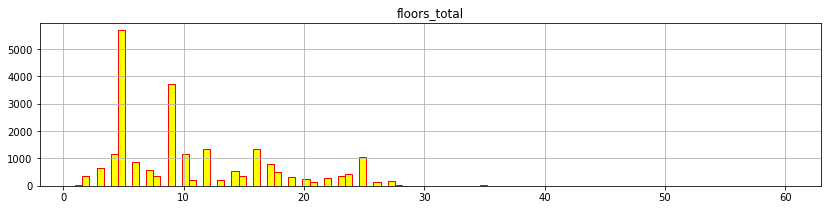

In [42]:
data.hist('floors_total', bins=100, figsize=(14,3), color = "yellow", ec = "red", range=(1, 60));

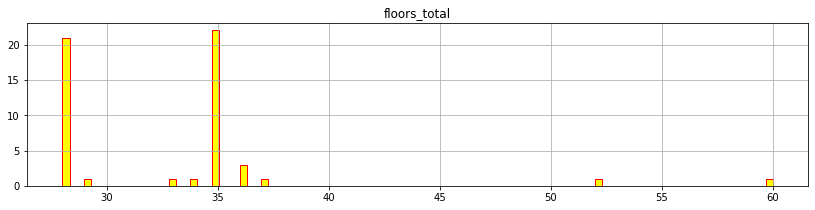

In [43]:
data.hist('floors_total', bins=100, figsize=(14,3), color = "yellow", ec = "red", range= (28, 60));

In [44]:
data = data.loc[(data['floors_total'] >= 1) & (data['floors_total'] < 36)]
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['floors_total'].describe())

RangeIndex(start=0, stop=23086, step=1)
count    23086.000000
mean        10.667288
std          6.555610
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64


In [45]:
display(data.query('1 >= floors_total and floors_total < 36'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2988,20,2000000,80,2018-01-03,3,NaN,1,48.5,1,False,...,10.0,0,Волосово,NaN,NaN,0,NaN,0,NaN,44.0
4265,5,5300000,58,2017-11-15,2,NaN,1,31.6,1,False,...,9.4,0,поселок городского типа Рощино,NaN,NaN,0,NaN,0,NaN,226.0
5163,5,2990000,60,2018-11-15,3,NaN,1,50.0,1,False,...,10.0,0,поселок станции Вещево,NaN,NaN,0,NaN,0,NaN,40.0
5552,7,450000,42,2017-07-31,2,NaN,1,23.0,1,False,...,5.8,0,городской посёлок Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
5637,16,9000000,88,2018-08-06,3,NaN,1,NaN,1,False,...,NaN,0,Санкт-Петербург,44870.0,20802.0,0,NaN,1,792.0,60.0
7759,4,550000,46,2018-04-20,3,NaN,1,NaN,1,False,...,NaN,0,Луга,NaN,NaN,0,NaN,0,NaN,45.0
8127,10,2700000,80,2018-07-07,3,3.00,1,45.0,1,False,...,15.0,0,Луга,NaN,NaN,0,NaN,0,NaN,51.0
8180,20,3550000,48,2019-03-30,3,2.65,1,33.9,1,False,...,9.1,0,Сестрорецк,50046.0,31144.0,0,NaN,0,NaN,NaN
9278,4,1200000,39,2018-01-08,2,NaN,1,NaN,1,False,...,NaN,0,посёлок Гаврилово,NaN,NaN,0,NaN,0,NaN,45.0
9507,16,850000,62,2018-11-10,2,NaN,1,31.0,1,False,...,11.0,0,деревня Сижно,NaN,NaN,0,NaN,0,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23081,9,9700000,133,2017-03-21,3,3.7,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23082,14,3100000,59,2018-01-15,3,NaN,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23083,18,2500000,56,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23084,13,11475000,76,2017-03-28,2,3.0,17,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0
23085,4,1350000,32,2017-07-21,1,2.5,5,12.3,1,False,...,9.00,0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN


RangeIndex(start=0, stop=23086, step=1)


Отсортировали всего этажей от 1 до 36

In [46]:
print(data['locality_name'].value_counts())
print()
print("Кол-во пропущеных значений", data['locality_name'].isna().sum())
print()
display(data['locality_name'].sort_values().unique())

Санкт-Петербург                    15273
посёлок Мурино                       494
посёлок Шушары                       435
Всеволожск                           392
Пушкин                               365
                                   ...  
посёлок Белоостров                     1
деревня Пельгора                       1
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Дзержинского                   1
Name: locality_name, Length: 362, dtype: int64

Кол-во пропущеных значений 0



array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [47]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'поселок')
display(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

* Обработали неявные дубликаты в населенных пунктах

In [48]:
#  check
data['locality_name'].nunique()

316

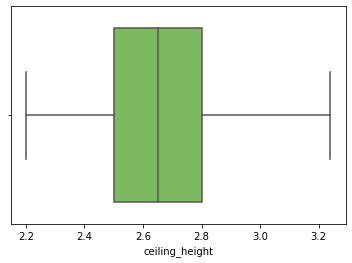

In [49]:
colors = ['#78C850']
sns.boxplot(x= data.ceiling_height, showfliers=False, palette=colors);

In [50]:
display(data['ceiling_height'].sort_values().unique())

array([  1.  ,   1.2 ,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,   2.4 ,
         2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,   2.52,
         2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,   2.6 ,
         2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,   2.68,
         2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,   2.76,
         2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,   2.84,
         2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,   2.92,
         2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,   3.  ,
         3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,   3.08,
         3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,   3.16,
         3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,   3.25,
         3.26,   3.27,   3.28,   3.3 ,   3.31,   3.32,   3.33,   3.34,
         3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,   3.44,
         3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.52,   3.53,
      

Нормальной высотой потолков считается дапазон 2.5 м и 3.2 м. Но проанализиров данные из интернета, в Санкт-Петербурге, есть квартиры с высотой и 4.2 м. Попробуем обработать аномалии

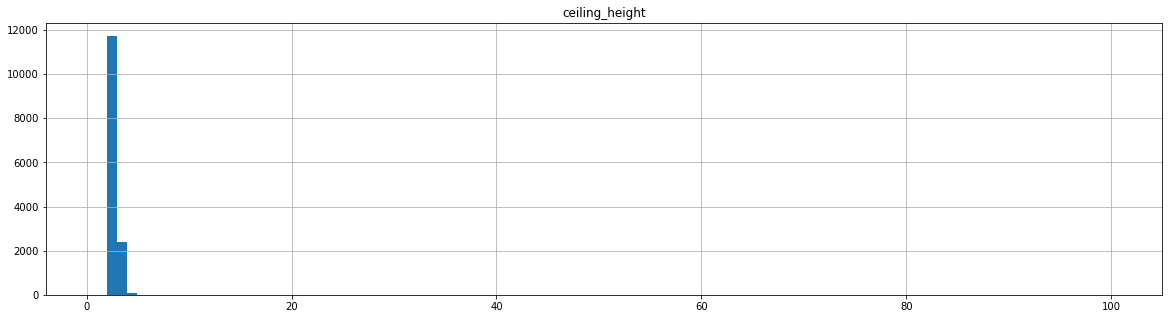

In [51]:
data.hist('ceiling_height', bins=100, figsize=(20,5), range = (1,100))
plt.show()

In [52]:
data['ceiling_height'].value_counts()

2.50    3509
2.60    1632
2.70    1542
3.00    1083
2.55     977
        ... 
4.40       1
2.34       1
5.30       1
2.20       1
3.59       1
Name: ceiling_height, Length: 171, dtype: int64

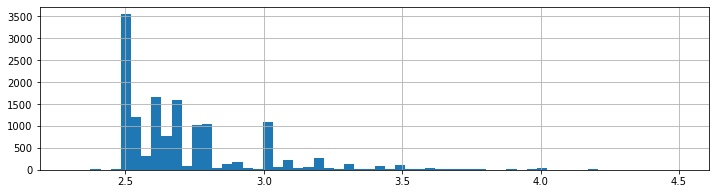

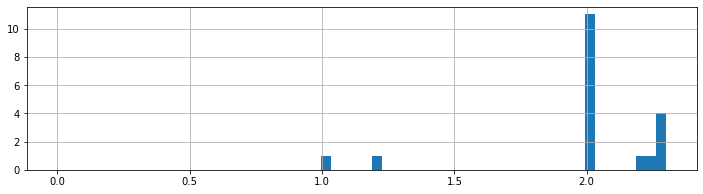

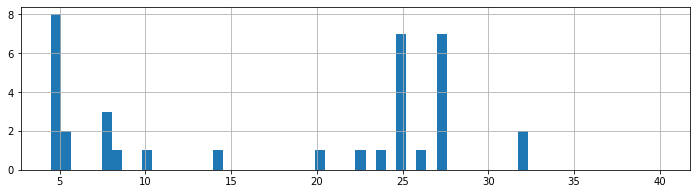

In [53]:
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(2.3, 4.5));
plt.show()
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(0,2.3));
plt.show()
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(4.5,40));
plt.show()

<AxesSubplot:title={'center':'Высота потолков'}, xlabel='ceiling_height'>

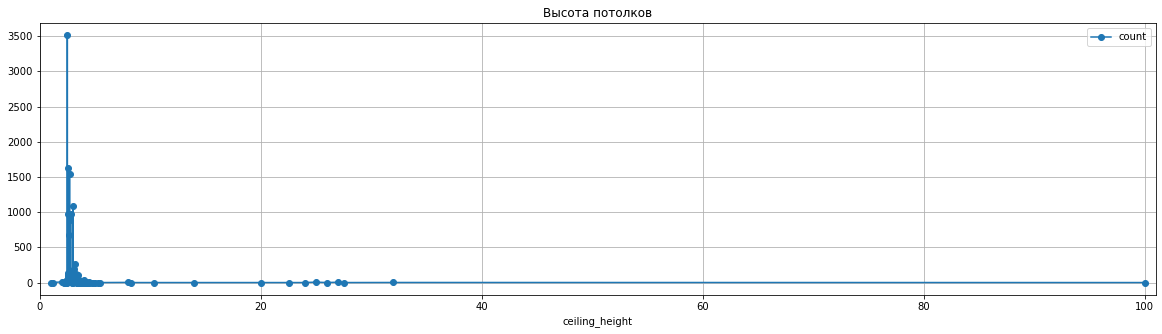

In [54]:
ch = data.groupby('ceiling_height')['ceiling_height'].agg({'count'})
ch.plot(title='Высота потолков', style='o-', figsize=(20,5), grid=True, xlim=(0, 101))

In [55]:
#Отсортируем высоту >=22 делением на 10

data.loc[data['ceiling_height'] >= 22.00, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 22.00, 'ceiling_height']  / 10

#Отсортируем высоту >=10 но <=21 делением на 5

data.loc[(data['ceiling_height'] >= 10.00) & (data['ceiling_height'] <= 21.00), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 10.00) & (data['ceiling_height'] <= 21.00), 'ceiling_height'] / 5

#Отсортируем высоту <2

data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = np.nan
data.reset_index(inplace=True, drop=True)
data['ceiling_height'].describe()

count    14201.000000
mean         2.719427
std          0.278428
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

In [56]:
display(data['ceiling_height'].sort_values().unique())

array([2.  , 2.06, 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47,
       2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58,
       2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69,
       2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 ,
       2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91,
       2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02,
       3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13,
       3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25,
       3.26, 3.27, 3.28, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.42, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63,
       3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.83,
       3.84, 3.85, 3.86, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 ,
       4.14, 4.15, 4.19, 4.2 , 4.25, 4.3 , 4.37, 4.

In [57]:
print("Кол-во пропусков =", data['ceiling_height'].isna().sum()) #было 9195 пропусков

Кол-во пропусков = 8885


In [58]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

#Заполнили пропуски медианным значением(более подходит логически)

In [59]:
data['ceiling_height'].describe()

count    23086.000000
mean         2.692707
std          0.220967
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

In [60]:
print("Кол-во пропусков =", data['ceiling_height'].isna().sum()) #было 9195 пропусков

Кол-во пропусков = 0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23086 entries, 0 to 23085
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23086 non-null  int64         
 1   last_price            23086 non-null  int32         
 2   total_area            23086 non-null  int32         
 3   first_day_exposition  23086 non-null  datetime64[ns]
 4   rooms                 23086 non-null  int64         
 5   ceiling_height        23086 non-null  float64       
 6   floors_total          23086 non-null  int32         
 7   living_area           21266 non-null  float64       
 8   floor                 23086 non-null  int64         
 9   is_apartment          23086 non-null  bool          
 10  studio                23086 non-null  bool          
 11  open_plan             23086 non-null  bool          
 12  kitchen_area          21104 non-null  float64       
 13  balcony         

Отсортировали значения высота потолков аномальные значения делением на 10 и 5. Заполнили пропуски медианными значениеми. Для Санкт-Петербурга вполне возможна высота потолка максимально 8.30 м в старых элитных постройках.

In [62]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1820
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1982
balcony                     0
locality_name               0
airports_nearest         5435
cityCenters_nearest      5414
parks_around3000            0
parks_nearest           15266
ponds_around3000            0
ponds_nearest           14308
days_exposition          3088
dtype: int64

In [63]:
display(data['living_area'].sort_values().unique())

array([  2. ,   3. ,   5.4, ..., 175. , 200. ,   nan])

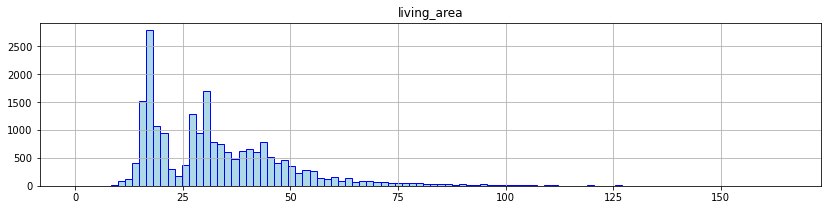

In [64]:
data.hist('living_area', bins=basket, figsize=(14,3), color = "lightblue", ec = "blue", range=(0, 165));

In [65]:
display(data['kitchen_area'].sort_values().unique())

array([  1.3 ,   2.  ,   2.3 ,   2.89,   3.  ,   3.2 ,   3.3 ,   3.4 ,
         3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,   4.4 ,
         4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,   5.06,
         5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,   5.29,
         5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,   5.47,
         5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,   5.64,
         5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,   5.82,
         5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,   6.1 ,
         6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,   6.26,
         6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,   6.37,
         6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,   6.62,
         6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,   6.82,
         6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,   7.  ,
         7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,   7.17,
      

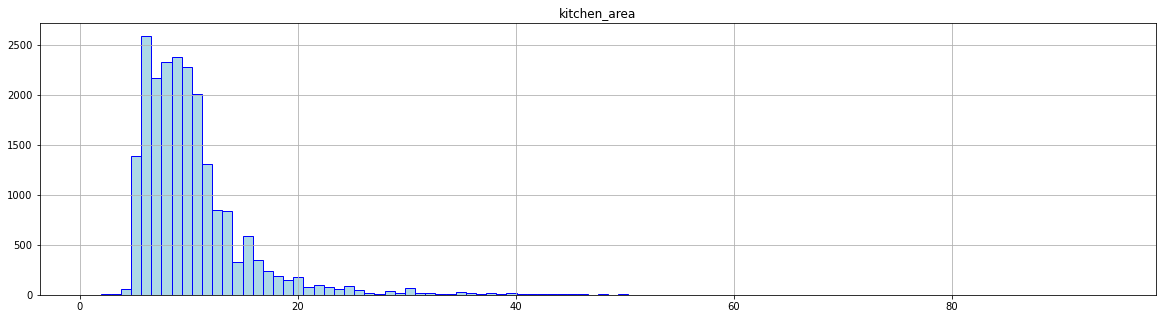

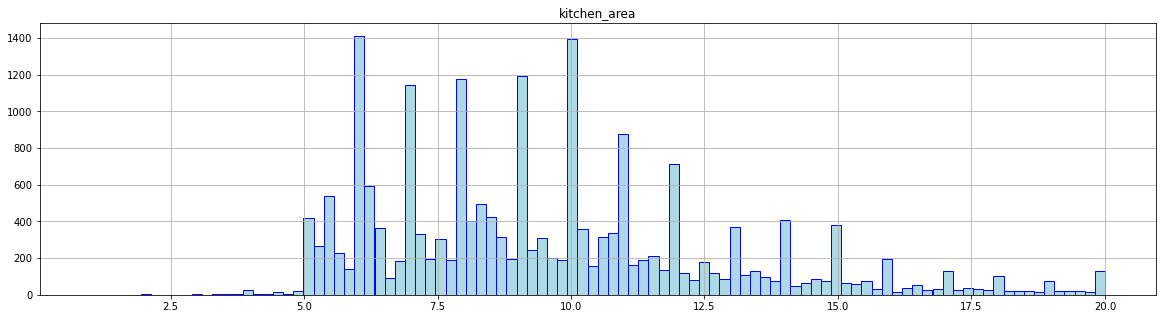

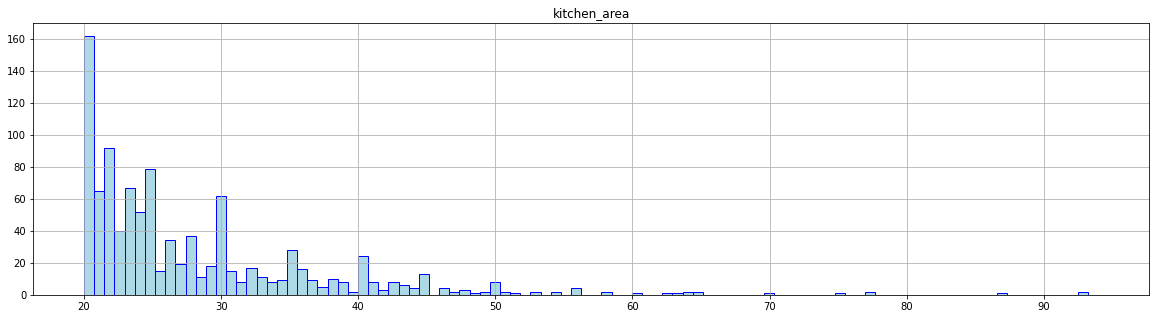

In [66]:
data.hist('kitchen_area', bins=basket, figsize=(20,5), color = "lightblue", ec = "blue", range=(1, 94));
data.hist('kitchen_area', bins=basket, figsize=(20,5), color = "lightblue", ec = "blue", range=(1, 20));
data.hist('kitchen_area', bins=basket, figsize=(20,5), color = "lightblue", ec = "blue", range=(20, 94));

Нормативами площади кухни считают от 4 м до кухни-столовой 30 м

In [67]:
#Отсортируем площадь кухни >=4 но < 30

data = data.query('kitchen_area.isna() | kitchen_area >= 4 and kitchen_area < 30')
print(data['kitchen_area'].describe())

count    20763.000000
mean         9.965769
std          3.967311
min          4.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         29.900000
Name: kitchen_area, dtype: float64


In [68]:
# check

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22745 entries, 0 to 23085
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22745 non-null  int64         
 1   last_price            22745 non-null  int32         
 2   total_area            22745 non-null  int32         
 3   first_day_exposition  22745 non-null  datetime64[ns]
 4   rooms                 22745 non-null  int64         
 5   ceiling_height        22745 non-null  float64       
 6   floors_total          22745 non-null  int32         
 7   living_area           20941 non-null  float64       
 8   floor                 22745 non-null  int64         
 9   is_apartment          22745 non-null  bool          
 10  studio                22745 non-null  bool          
 11  open_plan             22745 non-null  bool          
 12  kitchen_area          20763 non-null  float64       
 13  balcony         

In [69]:
print("Кол-во пропусков =", data['kitchen_area'].isna().sum())

Кол-во пропусков = 1982


In [70]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) 

#Заполнили пропуски медианным значением(более подходит логически)

In [71]:
print("Кол-во пропусков =", data['kitchen_area'].isna().sum())

Кол-во пропусков = 0


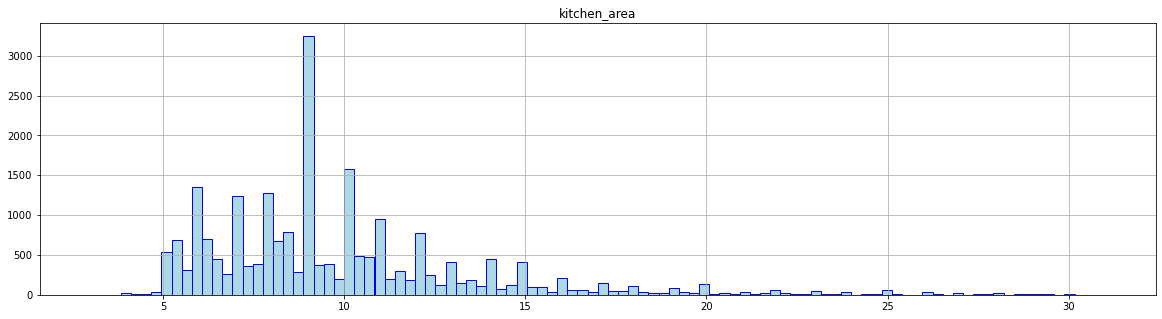

In [72]:
data.hist('kitchen_area', bins=basket, figsize=(20,5), color = "lightblue", ec = "blue", range=(3, 31));

In [73]:
print(data['kitchen_area'].describe())

count    22745.000000
mean         9.881612
std          3.800283
min          4.000000
25%          7.200000
50%          9.000000
75%         11.100000
max         29.900000
Name: kitchen_area, dtype: float64


In [74]:
display(data['kitchen_area'].sort_values().unique())

array([ 4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,  4.6 ,  4.7 ,  4.8 ,
        4.9 ,  5.  ,  5.04,  5.06,  5.1 ,  5.14,  5.2 ,  5.21,  5.23,
        5.25,  5.28,  5.29,  5.3 ,  5.31,  5.33,  5.35,  5.4 ,  5.42,
        5.44,  5.47,  5.49,  5.5 ,  5.53,  5.59,  5.6 ,  5.61,  5.62,
        5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,  5.78,  5.8 ,  5.82,
        5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,  6.03,  6.1 ,  6.16,
        6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,  6.26,  6.27,  6.28,
        6.3 ,  6.31,  6.33,  6.35,  6.36,  6.37,  6.4 ,  6.47,  6.5 ,
        6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,  6.7 ,  6.72,  6.73,
        6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,  6.86,  6.9 ,  6.91,
        6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,  7.09,  7.1 ,  7.12,
        7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,  7.36,  7.4 ,  7.41,
        7.48,  7.5 ,  7.54,  7.6 ,  7.63,  7.65,  7.7 ,  7.71,  7.78,
        7.8 ,  7.84,  7.85,  7.86,  7.87,  7.89,  7.9 ,  7.92,  7.94,
        7.95,  7.97,

Отсортировали площадь кухни

In [75]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1804
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5413
cityCenters_nearest      5392
parks_around3000            0
parks_nearest           15106
ponds_around3000            0
ponds_nearest           14162
days_exposition          2999
dtype: int64

Поработаем с жилой площадью

In [76]:
display(data['living_area'].sort_values().unique())

array([  2. ,   3. ,   5.4, ..., 175. , 200. ,   nan])

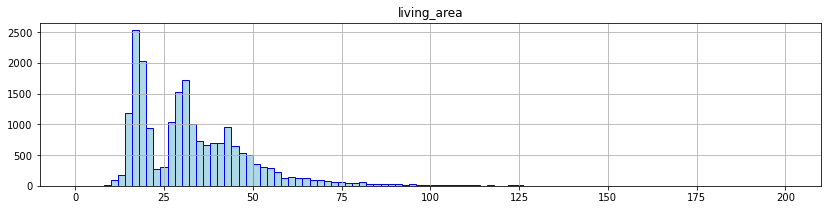

In [77]:
data.hist('living_area', bins=basket, figsize=(14,3), color = "lightblue", ec = "blue", range=(0, 200));

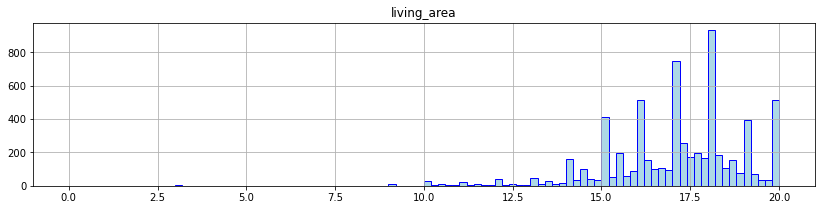

In [78]:
data.hist('living_area', bins=basket, figsize=(14,3), color = "lightblue", ec = "blue", range=(0, 20));

In [79]:
display(data.query('total_area*0.9 <= (living_area + kitchen_area)'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74,2016-05-04,3,2.65,14,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1,725.0,1,759.0,179.0
78,12,2590000,55,2017-12-18,3,2.50,4,42.6,4,False,...,7.0,0,Кировск,NaN,NaN,0,NaN,0,NaN,463.0
168,6,3800000,49,2019-02-22,2,2.50,9,38.0,8,False,...,10.0,1,поселок Шушары,18471.0,24272.0,0,NaN,0,NaN,11.0
181,7,2600000,30,2018-02-14,1,2.65,9,26.1,5,False,...,6.2,0,Санкт-Петербург,13952.0,15031.0,0,NaN,1,824.0,12.0
215,8,3890000,37,2018-07-09,1,2.50,25,28.0,6,False,...,9.0,0,Санкт-Петербург,25408.0,16166.0,0,NaN,0,NaN,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22816,1,3345000,29,2018-08-09,1,2.65,27,20.3,3,False,...,9.0,1,поселок Парголово,52912.0,19089.0,0,NaN,0,NaN,247.0
22868,16,5900000,40,2019-03-16,2,2.73,17,31.0,16,False,...,5.0,4,Санкт-Петербург,19901.0,21613.0,0,NaN,1,1003.0,NaN
22914,13,8500000,65,2018-11-01,2,2.65,4,44.0,2,False,...,15.3,0,Санкт-Петербург,22276.0,3996.0,1,627.0,0,NaN,NaN
22970,7,2350000,24,2018-06-07,1,2.65,10,18.0,2,False,...,9.0,0,Кудрово,NaN,NaN,0,NaN,0,NaN,89.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23081,9,9700000,133,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23082,14,3100000,59,2018-01-15,3,2.65,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23083,18,2500000,56,2018-02-11,2,2.65,3,29.7,1,False,...,9.00,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23084,13,11475000,76,2017-03-28,2,3.00,17,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0
23085,4,1350000,32,2017-07-21,1,2.50,5,12.3,1,False,...,9.00,0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN


Int64Index([    0,     1,     2,     3,     5,     6,     7,     8,     9,
               10,
            ...
            23076, 23077, 23078, 23079, 23080, 23081, 23082, 23083, 23084,
            23085],
           dtype='int64', length=22745)


In [80]:
data = data.query('living_area.isna() | living_area >= 12 and living_area < 250')
print(data['living_area'].describe())

count    20827.000000
mean        33.124951
std         16.907705
min         12.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64


In [81]:
# check
data.shape[0]

22631

In [82]:
display(data.query('12 >= living_area and living_area < 250'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
100,4,3000000,37,2019-03-23,1,2.75,10,12.0,3,False,...,13.00,0,садовое товарищество Новая Ропша,NaN,NaN,0,NaN,0,NaN,NaN
1179,12,2700000,42,2015-10-14,1,2.74,16,12.0,14,False,...,18.00,1,деревня Старая,NaN,NaN,0,NaN,0,NaN,571.0
2257,7,2222222,24,2017-12-04,1,2.65,18,12.0,11,False,...,7.00,1,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,198.0
2492,14,8550000,44,2019-03-05,1,2.80,14,12.0,4,False,...,21.20,0,Санкт-Петербург,31842.0,5693.0,2,382.0,0,NaN,NaN
3248,6,3090000,33,2017-01-17,1,2.65,5,12.0,4,False,...,11.00,0,Санкт-Петербург,47039.0,25599.0,1,126.0,1,979.0,489.0
4197,6,6500000,40,2019-04-22,1,2.65,25,12.0,22,False,...,22.00,0,Санкт-Петербург,10031.0,13330.0,1,915.0,0,NaN,NaN
4324,6,2300000,31,2016-05-26,1,2.65,3,12.0,1,False,...,9.00,0,Зеленогорск,78527.0,59626.0,0,NaN,0,NaN,232.0
5788,1,2400000,43,2019-04-29,2,2.65,17,12.0,4,False,...,20.00,0,Мурино,NaN,NaN,0,NaN,0,NaN,NaN
6393,10,7407105,50,2016-11-20,1,2.65,5,12.0,3,False,...,24.00,0,Санкт-Петербург,27986.0,6924.0,1,834.0,3,665.0,492.0
7002,9,3800000,43,2017-05-20,1,2.65,14,12.0,2,False,...,19.00,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,129.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23081,9,9700000,133,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23082,14,3100000,59,2018-01-15,3,2.65,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23083,18,2500000,56,2018-02-11,2,2.65,3,29.7,1,False,...,9.00,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23084,13,11475000,76,2017-03-28,2,3.00,17,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0
23085,4,1350000,32,2017-07-21,1,2.50,5,12.3,1,False,...,9.00,0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN


Int64Index([    0,     1,     2,     3,     5,     7,     8,     9,    10,
               11,
            ...
            23076, 23077, 23078, 23079, 23080, 23081, 23082, 23083, 23084,
            23085],
           dtype='int64', length=22631)


In [83]:
print("Кол-во пропусков =", data['living_area'].isna().sum())

Кол-во пропусков = 1804


In [84]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median()) 

#Заполнили пропуски медианным значением(более подходит логически)

In [85]:
print("Кол-во пропусков =", data['living_area'].isna().sum())
print(data['living_area'].describe())

Кол-во пропусков = 0
count    22631.000000
mean        32.875850
std         16.241863
min         12.000000
25%         19.100000
50%         30.000000
75%         40.700000
max        200.000000
Name: living_area, dtype: float64


In [86]:
display(data.query('total_area*0.9 <= (living_area + kitchen_area)'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
30,12,2200000,32,2018-02-19,1,2.65,9,30.0,2,False,...,9.0,0,Коммунар,NaN,NaN,0,NaN,0,NaN,63.0
41,16,7900000,74,2016-05-04,3,2.65,14,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1,725.0,1,759.0,179.0
44,13,5350000,40,2018-11-18,1,2.65,22,30.0,3,False,...,9.0,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
59,3,2740000,35,2018-01-01,1,2.65,12,30.0,8,False,...,9.0,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,11.0
78,12,2590000,55,2017-12-18,3,2.50,4,42.6,4,False,...,7.0,0,Кировск,NaN,NaN,0,NaN,0,NaN,463.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,7,2350000,24,2018-06-07,1,2.65,10,18.0,2,False,...,9.0,0,Кудрово,NaN,NaN,0,NaN,0,NaN,89.0
22990,10,2900000,43,2018-01-11,2,2.65,5,30.0,1,False,...,9.0,0,Санкт-Петербург,22001.0,14193.0,1,202.0,2,397.0,45.0
23021,20,5000000,38,2018-06-23,1,2.55,16,30.0,15,False,...,9.0,1,Санкт-Петербург,31118.0,7257.0,1,241.0,1,230.0,113.0
23066,0,2500000,35,2017-12-08,1,2.65,9,30.0,4,False,...,9.0,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45.0


In [87]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5385
cityCenters_nearest      5364
parks_around3000            0
parks_nearest           15030
ponds_around3000            0
ponds_nearest           14096
days_exposition          2989
dtype: int64

In [88]:
data['parks_nearest'].describe()

count    7601.000000
mean      492.576898
std       340.451157
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [89]:
display(data['parks_nearest'])

0        482.0
1          NaN
2         90.0
3         84.0
5          NaN
         ...  
23081    796.0
23082      NaN
23083      NaN
23084    173.0
23085      NaN
Name: parks_nearest, Length: 22631, dtype: float64

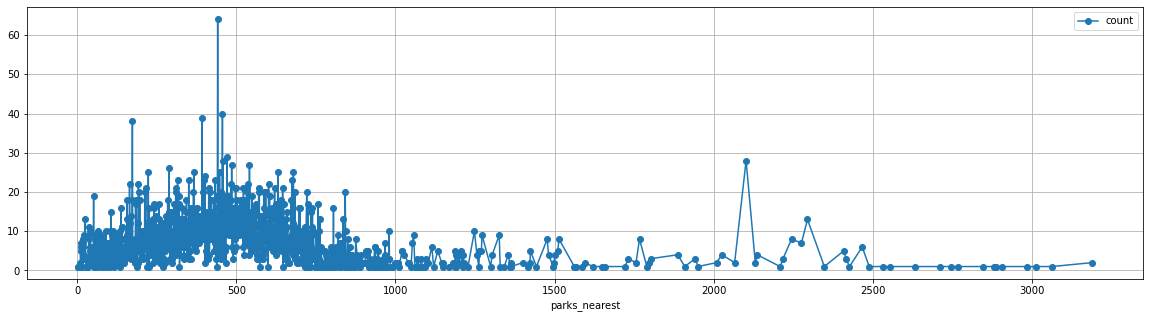

In [90]:
pn = data.groupby('parks_nearest')['locality_name'].agg({'count'})
pn.plot(style='o-', figsize=(20,5), grid=True);

In [91]:
for a in data['locality_name'].unique():
    data.loc[(data['locality_name'] == a) & (data['parks_nearest'].isna()),'parks_nearest'] = \
    data.loc[(data['locality_name'] == a),'parks_nearest'].median()

In [92]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].mean()) #Остальное заменим на среднее


In [93]:
print("Кол-во пропусков =", data['parks_nearest'].isna().sum()) #Было 15620 пропусков

Кол-во пропусков = 0


In [94]:
data['ponds_nearest'].describe()

count    8535.000000
mean      522.671353
std       277.347071
min        13.000000
25%       303.000000
50%       507.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [95]:
print("Кол-во пропусков =", data['ponds_nearest'].isna().sum()) 

Кол-во пропусков = 14096


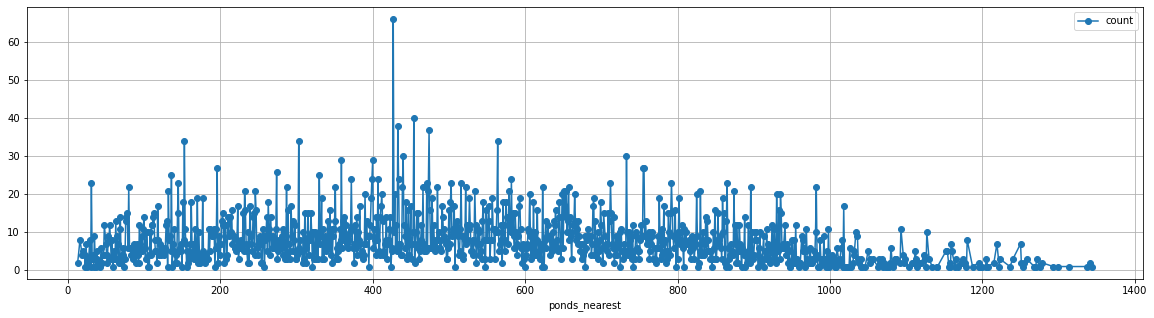

In [96]:
pnt = data.groupby('ponds_nearest')['locality_name'].agg({'count'})
pnt.plot(style='o-', figsize=(20,5), grid=True);

In [97]:
print("Кол-во пропусков =", data['ponds_nearest'].isna().sum()) 

Кол-во пропусков = 14096


In [98]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].mean()) #Остальное заменим на среднее

In [99]:
print("Кол-во пропусков =", data['ponds_nearest'].isna().sum()) 

Кол-во пропусков = 0


In [100]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5385
cityCenters_nearest     5364
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2989
dtype: int64

In [101]:
data.groupby('locality_name')['airports_nearest'].agg('count').sort_values(ascending = False).head(25)

locality_name
Санкт-Петербург            14829
поселок Шушары               424
Пушкин                       354
Колпино                      336
поселок Парголово            314
Петергоф                     199
Сестрорецк                   177
Красное Село                 173
Ломоносов                    131
Кронштадт                     94
поселок Металлострой          66
поселок Стрельна              41
Павловск                      37
Зеленогорск                   24
поселок Понтонный             20
поселок Сапёрный               6
поселок Молодёжное             5
поселок Песочный               4
поселок Лисий Нос              3
поселок Репино                 3
поселок Александровская        2
поселок Усть-Ижора             2
поселок Белоостров             1
поселок Левашово               1
поселок Ленинское              0
Name: airports_nearest, dtype: int64

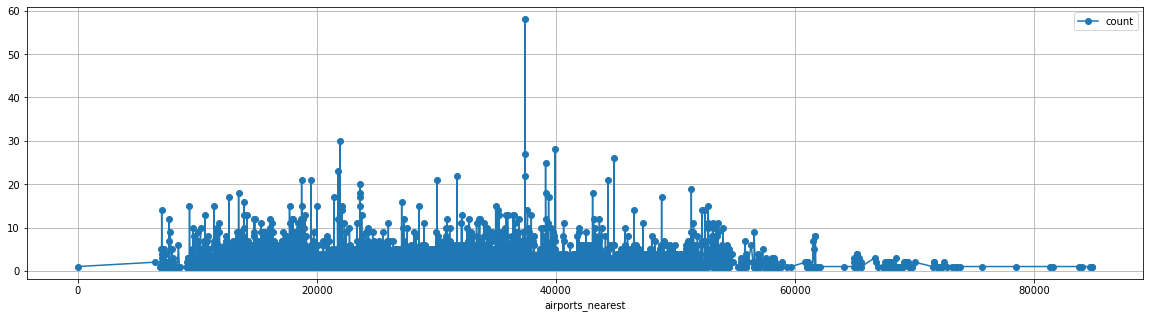

In [102]:
an = data.groupby('airports_nearest')['locality_name'].agg({'count'})
an.plot(style='o-', figsize=(20,5), grid=True);

In [103]:
data = data.query('airports_nearest.isna() | airports_nearest < 60000')

In [104]:
print("Кол-во пропусков =", data['airports_nearest'].isna().sum()) 

Кол-во пропусков = 5385


In [105]:
data['airports_nearest'].describe()

count    17076.000000
mean     28468.740045
std      12181.052833
min          0.000000
25%      18403.000000
50%      26725.500000
75%      36998.000000
max      59705.000000
Name: airports_nearest, dtype: float64

In [106]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean()) #Остальное заменим на среднее

In [107]:
print("Кол-во пропусков =", data['airports_nearest'].isna().sum())

Кол-во пропусков = 0


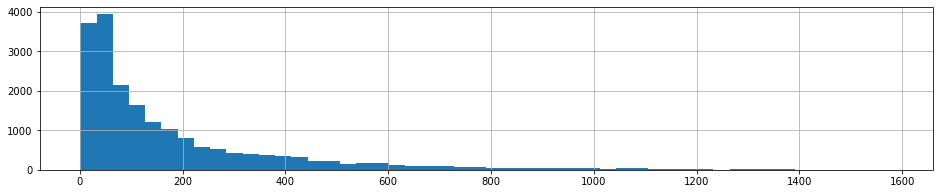

In [108]:
data['days_exposition'].hist(bins=50, figsize=(16,3));

In [109]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest     5364
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2974
dtype: int64

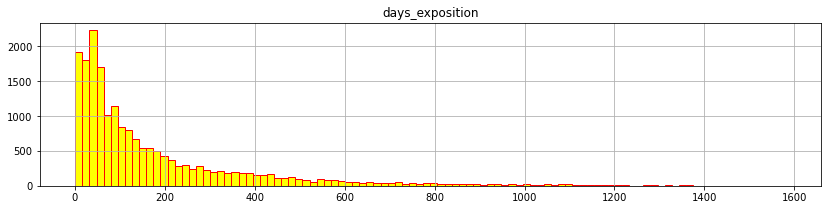

In [110]:
data.hist('days_exposition', bins=basket, figsize=(14,3), color = "yellow", ec = "red");

In [111]:
data['days_exposition'] = data['days_exposition'].round(0).astype('Int64') #Заменим тип

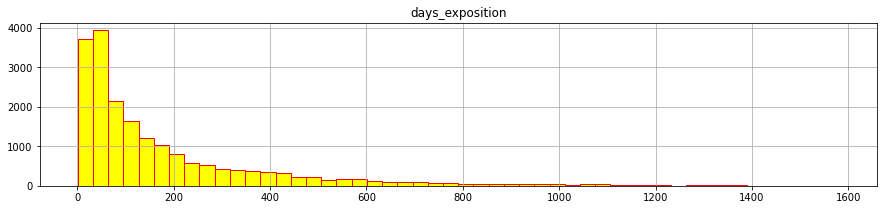

In [112]:
data.hist('days_exposition', bins=50, figsize=(15,3), color = "yellow", ec = "red");

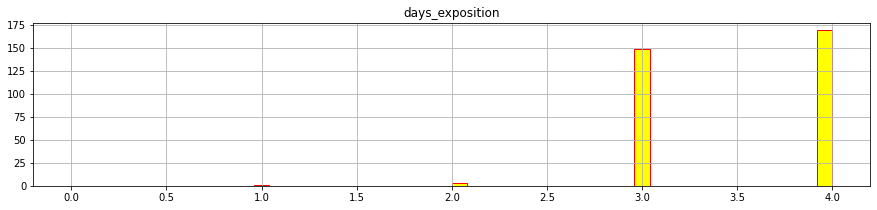

In [113]:
data.hist('days_exposition', bins=50, figsize=(15,3), color = "yellow", ec = "red", range=(0,4));

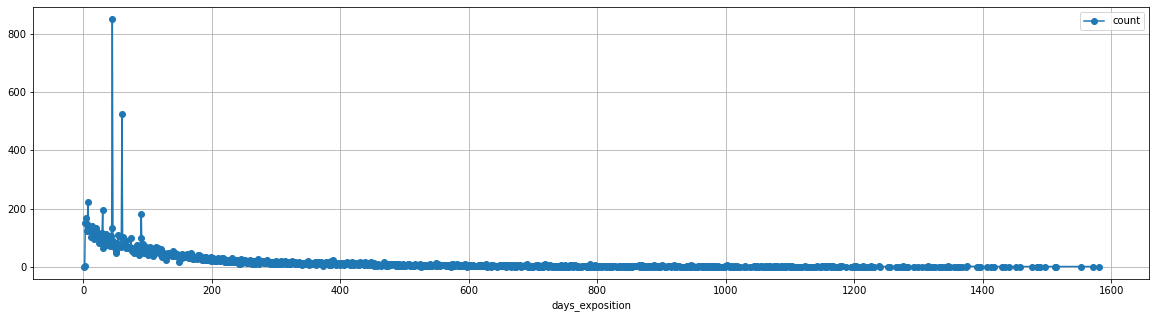

In [114]:
de = data.groupby('days_exposition')['locality_name'].agg({'count'})
de.plot(style='o-', figsize=(20,5), grid=True);

In [115]:
data['days_exposition'].describe()

count    19487.000000
mean       179.317442
std        217.933705
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [116]:
data = data.loc[(data['days_exposition']>2) & (data['days_exposition']<1550) | (data['days_exposition'].isna())]
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['days_exposition'].describe())

RangeIndex(start=0, stop=22454, step=1)
count    19480.000000
mean       179.139990
std        217.275162
min          3.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1513.000000
Name: days_exposition, dtype: float64


In [117]:
print("Кол-во пропусков =", data['days_exposition'].isna().sum())

Кол-во пропусков = 2974


In [118]:
display(data['days_exposition'].sort_values().unique()) # Заполнять пропуски не будем, возможно квартиры еще не проданы

<IntegerArray>
[   3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
 ...
 1452, 1458, 1477, 1484, 1485, 1489, 1497, 1512, 1513, <NA>]
Length: 1117, dtype: Int64

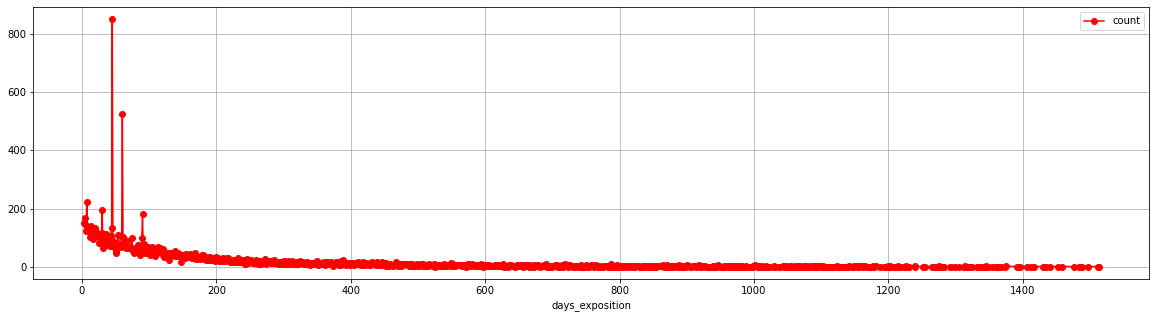

In [119]:
de = data.groupby('days_exposition')['locality_name'].agg({'count'})
de.plot(style='o-', color = "red", figsize=(20,5), grid=True);

In [120]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest     5363
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2974
dtype: int64

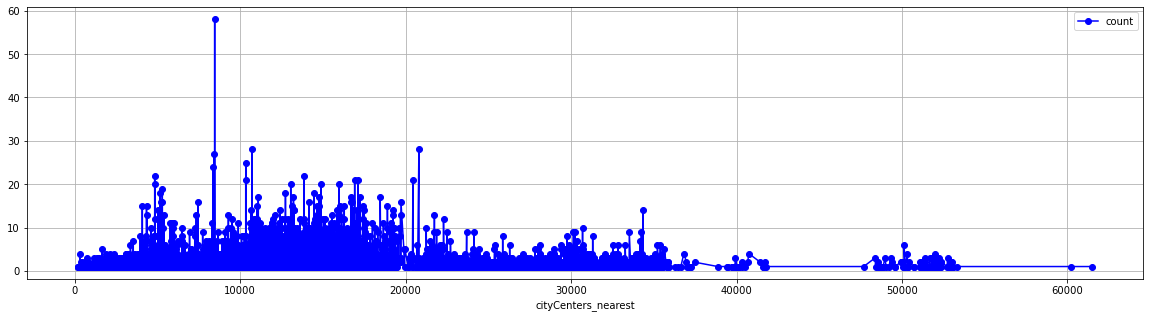

In [121]:
cc = data.groupby('cityCenters_nearest')['locality_name'].agg({'count'})
cc.plot(style='o-', color = "blue", figsize=(20,5), grid=True);

In [122]:
data.groupby('locality_name')['cityCenters_nearest'].agg('count').sort_values(ascending = False).head(25)

locality_name
Санкт-Петербург            14845
поселок Шушары               424
Пушкин                       353
Колпино                      336
поселок Парголово            284
Петергоф                     199
Красное Село                 173
Сестрорецк                   163
Ломоносов                    131
поселок Металлострой          66
поселок Стрельна              41
Павловск                      37
поселок Понтонный             20
поселок Сапёрный               6
поселок Песочный               4
поселок Лисий Нос              3
поселок Александровская        2
поселок Усть-Ижора             2
поселок Белоостров             1
поселок Левашово               1
поселок Лужайка                0
поселок Лесогорский            0
поселок Лукаши                 0
поселок Любань                 0
поселок Лесное                 0
Name: cityCenters_nearest, dtype: int64

<AxesSubplot:ylabel='Frequency'>

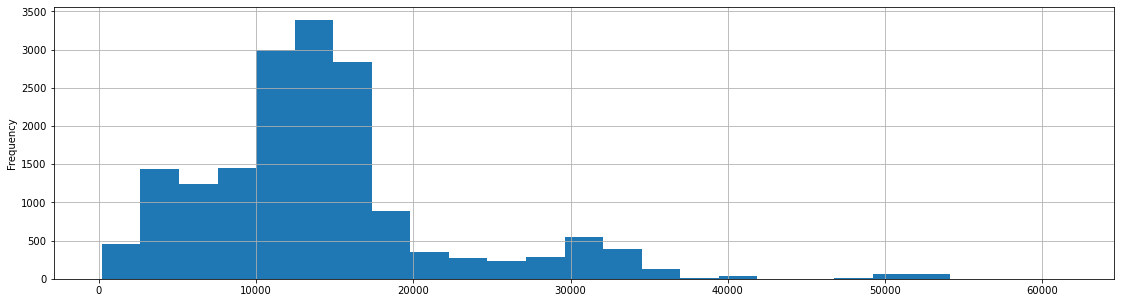

In [123]:
data['cityCenters_nearest'].plot(kind='hist',figsize=(19,5), y='cityCenters_nearest', bins=25, grid=True)

In [124]:
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['cityCenters_nearest'].isna()),'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == i),'cityCenters_nearest'].median()

In [125]:
print("Кол-во пропусков =", data['cityCenters_nearest'].isna().sum()) #было 5519

Кол-во пропусков = 5304


In [126]:
data = data.query('cityCenters_nearest.isna() | cityCenters_nearest < 54000')

In [127]:
print("Кол-во пропусков =", data['cityCenters_nearest'].isna().sum()) #было 5519

Кол-во пропусков = 5304


In [128]:
data['cityCenters_nearest'].describe()

count    17148.000000
mean     14090.317530
std       8003.170302
min        181.000000
25%       9571.000000
50%      13142.000000
75%      16231.000000
max      53294.000000
Name: cityCenters_nearest, dtype: float64

In [129]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median()) #Остальное заполним медианой

In [130]:
print("Кол-во пропусков =", data['cityCenters_nearest'].isna().sum()) #было 5519

Кол-во пропусков = 0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22452 entries, 0 to 22453
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22452 non-null  int64         
 1   last_price            22452 non-null  int32         
 2   total_area            22452 non-null  int32         
 3   first_day_exposition  22452 non-null  datetime64[ns]
 4   rooms                 22452 non-null  int64         
 5   ceiling_height        22452 non-null  float64       
 6   floors_total          22452 non-null  int32         
 7   living_area           22452 non-null  float64       
 8   floor                 22452 non-null  int64         
 9   is_apartment          22452 non-null  bool          
 10  studio                22452 non-null  bool          
 11  open_plan             22452 non-null  bool          
 12  kitchen_area          22452 non-null  float64       
 13  balcony         

#### В датафрейме было 23699 строки, после обработки данных осталось 22452. Все пропуски и неявные дубликаты обработаны. Необходимая педобработка данных произведена.

In [132]:
# Проверяем количество пропущенных значений
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2974
dtype: int64

In [133]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,452.00","22,452.00","22,452.00","19,478.00","22,452.00","22,452.00","22,452.00","22,452.00","22,452.00"
min,1.00,20.00,2.00,3.00,"430,000.00",12.00,4.00,1.00,1.00
max,5.00,245.00,8.30,"1,513.00","98,000,000.00",200.00,29.90,33.00,35.00


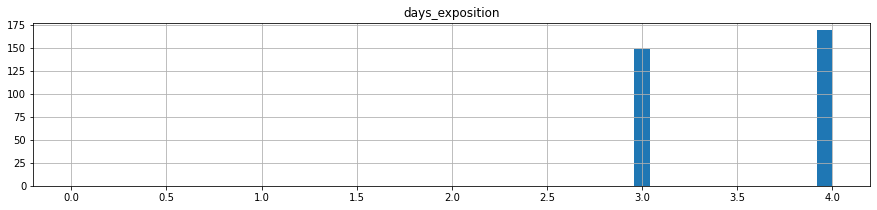

In [134]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,4));

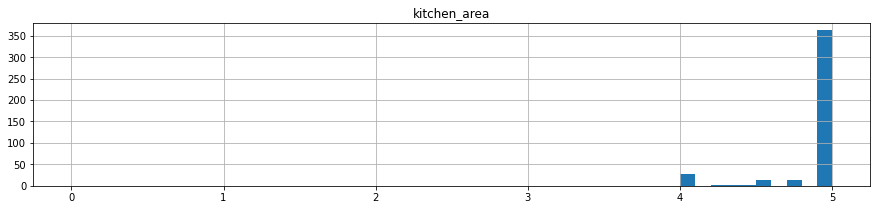

In [135]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [136]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7779
2,7719
3,5598
4,1081
5,275


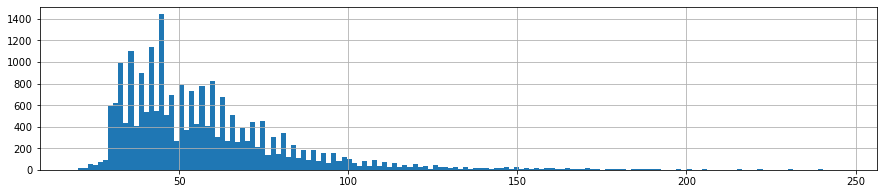

In [137]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

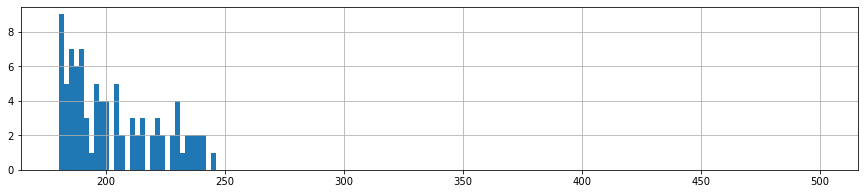

In [138]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [139]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,28.00,2.50,4.00,"1,000,000.00",14.00,5.00,1.00,2.00
0.500000,2.00,51.00,2.65,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.900000,3.00,88.00,3.00,453.00,"9,990,000.00",52.00,14.70,13.00,22.00
0.997600,5.00,191.12,4.00,"1,292.26","47,523,520.00",117.01,28.00,25.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы

In [140]:
#цена
data['metr_price'] = data['last_price'] / data['total_area']
data['metr_price'] = data['metr_price'].astype(int)
display(data['metr_price'].sample(3))
display(data.sample(3))
data['metr_price'].dtype

20897     67910
19947    132888
15345     90243
Name: metr_price, dtype: int32

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price
12847,1,2820000,33,2018-03-22,1,2.56,18,13.37,17,False,...,0,поселок Бугры,28468.740045,13142.0,0,478.447284,0,522.671353,26,85454
22369,14,4450000,37,2016-05-22,1,2.65,25,25.00,9,False,...,2,Санкт-Петербург,35847.000000,15853.0,0,464.000000,0,522.671353,65,120270
18823,17,6500000,83,2018-05-11,4,2.60,9,48.70,8,False,...,0,Санкт-Петербург,32912.000000,11403.0,1,365.000000,0,522.671353,<NA>,78313


dtype('int32')

In [141]:
#день недели публикации объявления

data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
display(data[['weekday', 'month', 'year']].sample(8))
display(data.sample(3))

,weekday,month,year
9275,0,10,2017
15043,1,10,2016
3801,4,6,2018
22037,1,11,2016
2388,4,8,2018
15209,1,1,2018
3795,4,4,2017
19471,3,4,2017


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year
7118,3,7700000,85,2016-01-29,3,2.65,25,39.0,5,False,...,12111.0,0,464.0,1,337.000000,187,90588,4,1,2016
20790,22,5600000,56,2017-11-22,2,2.65,12,32.4,3,False,...,15067.0,0,464.0,0,522.671353,23,100000,2,11,2017
10621,0,4299000,33,2017-02-08,1,2.65,22,18.0,5,False,...,10592.0,1,458.0,0,522.671353,45,130272,2,2,2017


In [142]:
def floor_type(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
def floor_type_cat(row):
    if row['floor']==1:
        return 1
    elif row['floor']==row['floors_total']:
        return 2
    else:
        return 3

In [143]:
data['floor_group'] = data.apply(floor_type, axis = 1)
data['floor_group_cat'] = data.apply(floor_type_cat, axis = 1)

In [144]:
data.floor_group.unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22452 entries, 0 to 22453
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22452 non-null  int64         
 1   last_price            22452 non-null  int32         
 2   total_area            22452 non-null  int32         
 3   first_day_exposition  22452 non-null  datetime64[ns]
 4   rooms                 22452 non-null  int64         
 5   ceiling_height        22452 non-null  float64       
 6   floors_total          22452 non-null  int32         
 7   living_area           22452 non-null  float64       
 8   floor                 22452 non-null  int64         
 9   is_apartment          22452 non-null  bool          
 10  studio                22452 non-null  bool          
 11  open_plan             22452 non-null  bool          
 12  kitchen_area          22452 non-null  float64       
 13  balcony         

In [146]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
#cityCenters_nearest
#citycenters_km

km = 1000
data['city_centers_km'] = (data['cityCenters_nearest'] / km).round()

### Проведите исследовательский анализ данных

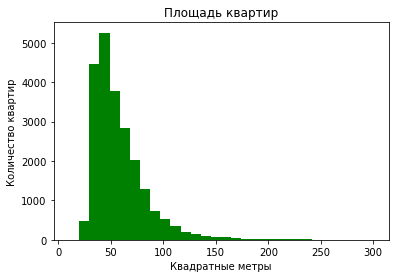

Наибольшие по площади варианты:
7116     245
2327     240
17725    240
10745    239
18917    238
1534     237
5777     236
15834    235
2012     234
2969     232
Name: total_area, dtype: int32


In [147]:
# Изучим общую площадь
plt.hist(data['total_area'], bins=30, color = 'green', range=(10,300))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

Проведя анализ графика, можно сказать, что популярнее всего квартиры, с площадью, от 30 до 60, что логично исходя анализу рынка, рентабельней и практичней. Проще продаь-купить. Но есть и выбросы, можно сказть, что квартиры больше 100 считаются "элитным жильем".

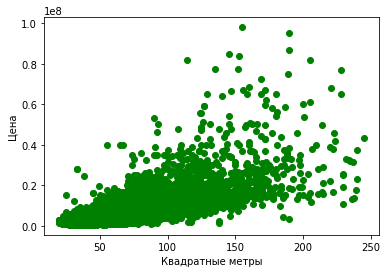

In [148]:
x = data['total_area']
y = data['last_price']
plt.scatter(x, y,color = 'green')
plt.xlabel('Квадратные метры')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены от общей площади, можно сказать, что, чаще всего встречаются квартиры от 30 до 100 м.

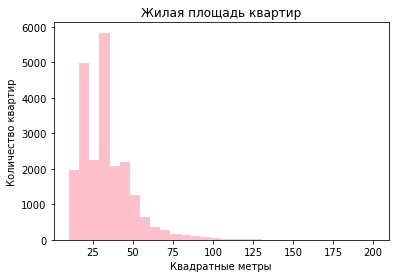

Наибольшие по площади варианты:
21697    200.0
8168     175.0
7116     170.8
1955     165.0
20537    164.7
15834    160.0
20873    160.0
7796     154.7
10745    154.0
4294     153.0
Name: living_area, dtype: float64


In [149]:
# Иучим жилую площадь

plt.hist(data['living_area'], bins=30, color = 'pink', range=(10,200))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

Жилая площадь — суммарное значение квадратных метров всех помещений объекта недвижимости, пригодных для жизни. Стандартный минимальный метраж — 18 кв. м на 1 человека. Согласно исследованию, имеются квартиры менее 25 м, что скорее всего свидетельствует - это студии. Популярнее значения от 30 до 55.

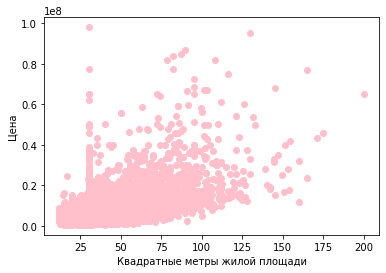

In [150]:
x = data['living_area']
y = data['last_price']
plt.scatter(x, y,color = 'pink')
plt.xlabel('Квадратные метры жилой площади')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены от жилой площади, можно сказать, что, чаще всего встречаются квартиры от 20 до 80 м.

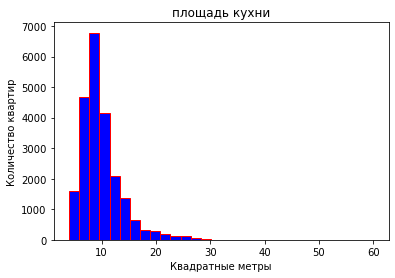

Наибольшие по площади варианты:
1473     29.9
5081     29.9
13335    29.9
11031    29.9
14970    29.8
11601    29.5
3534     29.4
18183    29.4
5940     29.4
21517    29.4
Name: kitchen_area, dtype: float64


In [151]:
# Изучим площадь кухни

plt.hist(data['kitchen_area'], bins=30, color = "blue", ec = "red", range=(4,60))
plt.title('площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Из анализа площади кухни, можно сказать, что значения от 7 до 13 являются стандартами показателями, т.к. площади кухни установлен минимум 4м.

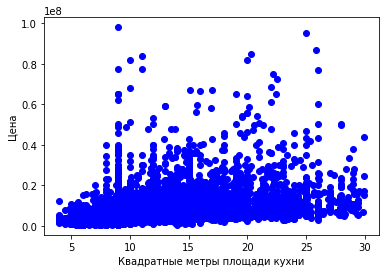

In [152]:
x = data['kitchen_area']
y = data['last_price']
plt.scatter(x, y,color = 'blue')
plt.xlabel('Квадратные метры площади кухни')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены площади кухни, можно сказать, что, чаще всего встречаются квартиры с кухней от 6 до 25 м, соответственно, чем больше площадь кухни, тем цена встречается и больше.

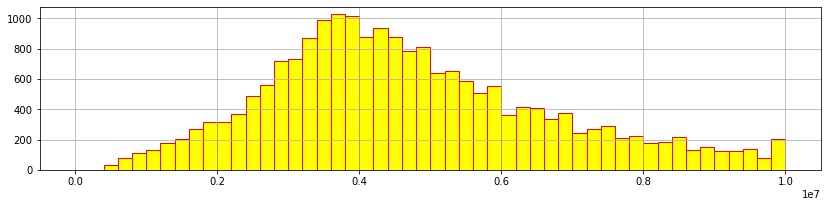

In [153]:
# Изучим цену объекта

data['last_price'].hist(color = "yellow", ec = "red",range=(0,10000000),figsize=(14,3), bins=50);

Можно сделать вывод, что больше всего квартир продаются по цене в диапазоне 1,8-8 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн. А в остальных случаях чем ниже и чем выше цена интерес пропорционально падает.

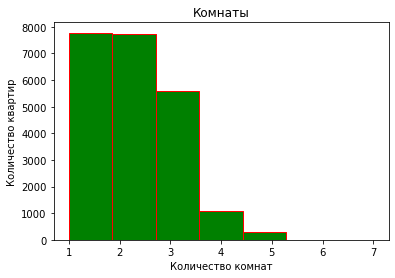

In [154]:
# Изучим количество комнат

plt.hist(data['rooms'], bins=7,color = "green", ec = "red", range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Исходя из графика, видно, что самые популярные квартиры - 1-комнатные и 2-комнатные(около 8000 квартир). 3-комнатные квартиры встречаются около 5500 раз, но, а квартиры от 4-комнат встречаются не более 1000 раз.

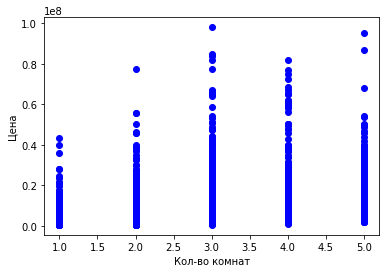

In [155]:
x = data['rooms']
y = data['last_price']
plt.scatter(x, y,color = 'blue')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены и кол-ва комнат, можно сказать, что, в цене квартиры с комнатами 3 и 4. Но и с 5 и 2 комнатами есть выбросы(все зависит от ремонта и класса жилья).

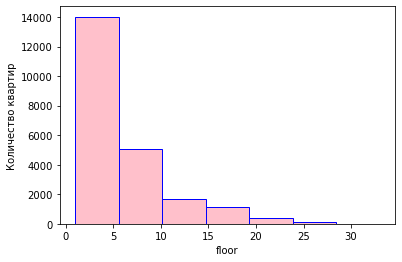

In [156]:
# Изучим этаж квартиры

plt.hist(data['floor'], bins=7, color = "pink", ec = "blue")
plt.xlabel('floor')
plt.ylabel('Количество квартир')
plt.show()

Исходя из анализа, можно сказать, что популярней квартиры с 1 по 6(встречается около 14000), от 6 до 10, тоже довольно часто(около 5000), но реже всего этажи выше 10.

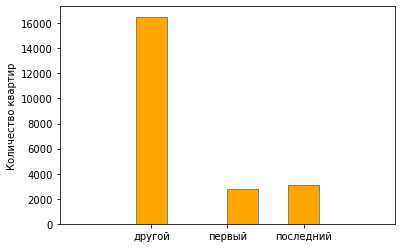

In [157]:
# Изучим тип этажа квартиры («первый», «последний», «другой»)

plt.hist(data['floor_group'], bins=10, color = "orange", ec = "gray", range=(-1,3))
plt.ylabel('Количество квартир')
plt.show()

Из анализа типа этажа квартиры, можно сказать, что популярнее всего значение другой(более 16000), первый (около 2000), а последний (около 3000).

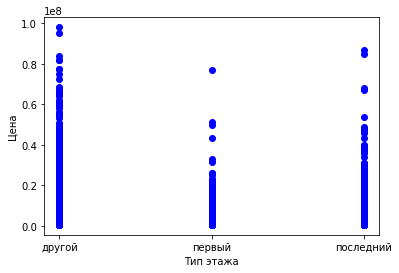

In [158]:
x = data['floor_group']
y = data['last_price']
plt.scatter(x, y,color = 'blue')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены и типа этажа, можно сказать, что, в цене квартиры с категорией "другой". Последний этаж тоже в цене, но первый менее всего.

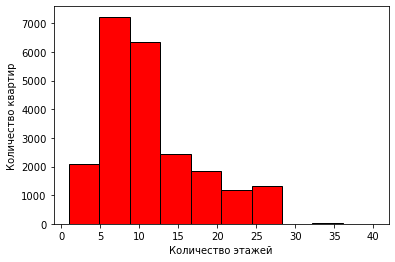

In [159]:
# Изучим общее количество этажей в доме

plt.hist(data['floors_total'], bins=10, color = "red", ec = "black", range=(1,40))
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Исходя из анализа, можно сказать, что чаще встречаются дома от 5 до 12 этажей. Самый максимальное значение примерно 9 этажей(Более 7000). От 1 до 5 встречается не более 2000. От 12 до 28 встречается не более 2300. Но есть и выбивающие значения - от 32 до 36.

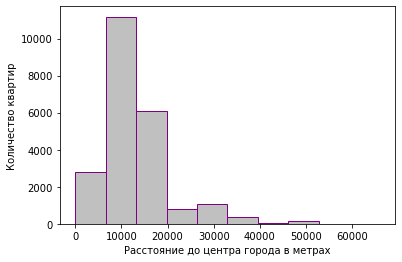

In [160]:
# Изучим расстояние до центра города в метрах

plt.hist(data['cityCenters_nearest'], bins=10, color = "silver", ec = "purple", range=(1,65968))
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

Исходя из анализа, можно сказать, что максимальное значение примерно от 9000 м до 14000 м до центра города(около 12000), реже встречаются значения от 14000 м до 20000 м (около 6000). Расстояние до центра города более 20000 м встречается не более 1500.

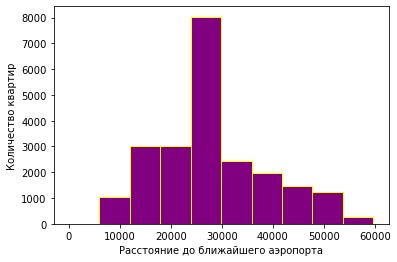

In [161]:
# Изучим расстояние до ближайшего аэропорта

plt.hist(data['airports_nearest'], bins=10, color = "purple", ec = "yellow",)
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество квартир')
plt.show()

 Исходя из анализа расстояния до ближайшего аэропорта, можно сказать, что максимальное значение встречается от 25000 м до 30000 м (около 8000). Так же расстояние от 11000 м до 25000 м встречается около 3000 квартир. Расстояние от 30000 м идет на понижение и не более 2500 квартир. Расстояние от 6000 м до 11000 м встречается не более 1000 квартир.

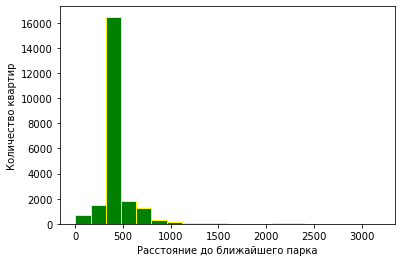

In [162]:
# Изучим расстояние до ближайшего парка

plt.hist(data['parks_nearest'], bins=20, color = "green", ec = "yellow")
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.figsize = (150,390)
plt.show()

При изучении расстояния до ближайшего парка, можно сказать, что максимальное число квартир приходится в диапазоне от 400 до 500 м(около 16000 квартир). Остальные значения расстояния до ближайшего парка не более 2000.

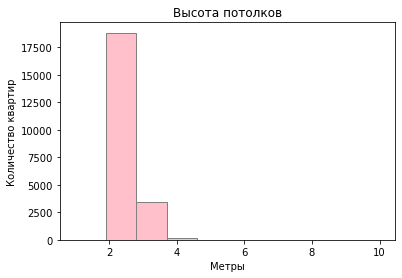

In [163]:
# Изучим высоту потолков

plt.hist(data['ceiling_height'], bins=10, color = "pink", ec = "gray", range=(1,10))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.figsize = (15,50)
plt.show()

Максимальное значение приходится от 2 до 3 метров(около 18000 квартир). Что согласно нормам-логично(не менее 2,7 м). Остальная высота потолков более 3 метров, можно предположить, что это  элитное жилье или старые постройки.

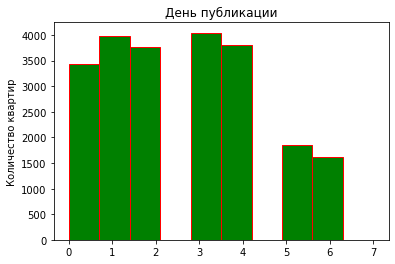

In [164]:
#Изучим день и месяц публикации объявления

plt.hist(data['weekday'], bins=10, color = "green", ec = "red", range=(0,7))
plt.title('День публикации')
plt.ylabel('Количество квартир')
plt.figsize = (15,50)
plt.show()

Исходя из анализа, можно сказать, что максимальное значение приходится на будни(значения около 4000). В выходные дни публикаций не более 2000. 

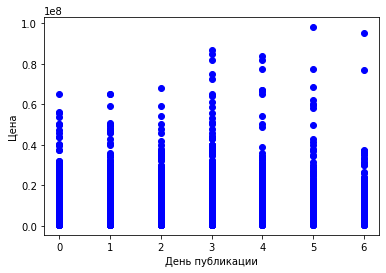

In [165]:
x = data['weekday']
y = data['last_price']
plt.scatter(x, y,color = 'blue')
plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены и дня публикации, можно сказать, что, ярко выраженная динамика видна в четверг. В воскресенье виден выброс цены в минимальные значения по соотношению других дней, но есть и выбросы. Точно сказать зависимость невозможно.

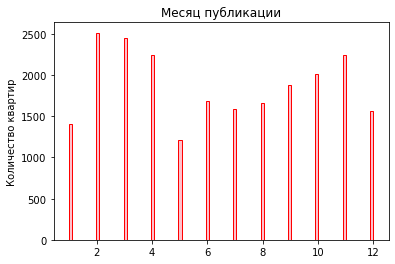

In [166]:
plt.hist(data['month'], bins=100, color = "pink", ec = "red")
plt.title('Месяц публикации')
plt.ylabel('Количество квартир')
plt.show()

Исходя из анализа, можно сказать, что чаще всего квартиры продаются в феврале, марте и апреле и ноябре(от 2000 до 2500 квартир). Наименьшими по продаже квартир являются месяца: январь, май, декабрь(не более 1500 квартир). Июнь, июль, август, сентябрь, ноябрь продаются не более 1600 квартир.

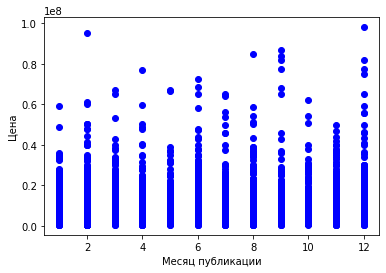

In [167]:
x = data['month']
y = data['last_price']
plt.scatter(x, y,color = 'blue')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены и месяца публикации, сказать о явных преимуществах невозможно. Думаю, согласно логике, в декабре у многих годовые и премии и цены поэтому варьируются больше.

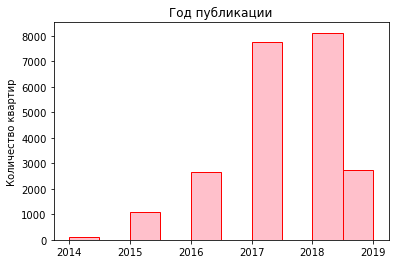

In [168]:
plt.hist(data['year'], bins=10, color = "pink", ec = "red")
plt.title('Год публикации')
plt.ylabel('Количество квартир')
plt.show()

Исследуя год публикации, можно сказать, что пиковым значением является 2017 и 2018 год(около 8000 квартир). Остальные года публикации, не более 3000 квартир.

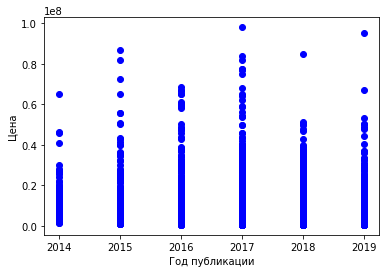

In [169]:
x = data['year']
y = data['last_price']
plt.scatter(x, y,color = 'blue')
plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.show()

Проведя анализ зависимости цены и года публикации, можно сказать, что в 2016 и 2017 году есть выраженные показатели роста цены.

### Вывод:

* Площадь

Проведя анализ графика, можно сказать, что популярнее всего квартиры, с площадью, от 30 до 60, что, логично исходя анализу рынка, рентабельней и практичней. Проще продать-купить. Но есть и выбросы, можно сказать, что квартиры больше 100 считаются "элитным жильем".
Проведя анализ зависимости цены от общей площади, можно сказать, что, чаще всего встречаются квартиры от 30 до 100 м.


* Жилая площадь

Жилая площадь — суммарное значение квадратных метров всех помещений объекта недвижимости, пригодных для жизни. Стандартный минимальный метраж — 18 кв. м на 1 человека. Согласно исследованию, имеются квартиры менее 25 м, что скорее всего свидетельствует - это студии. Популярнее значения от 30 до 55.
Проведя анализ зависимости цены от жилой площади, можно сказать, что, чаще всего встречаются квартиры от 20 до 80 м.


* Площадь кухни

Из анализа площади кухни, можно сказать, что значения от 7 до 13 являются стандартами показателями, т.к. площади кухни установлен минимум 4м.
Проведя анализ зависимости цены площади кухни, можно сказать, что, чаще всего встречаются квартиры с кухней от 6 до 25 м, соответственно, чем больше площадь кухни, тем цена встречается и больше.

 
* Стоимость

Можно сделать вывод, что больше всего квартир продаются по цене в диапазоне 1,8-8 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн. А в остальных случаях чем ниже и чем выше цена интерес пропорционально падает.

* Комнаты

Исходя из графика, видно, что самые популярные квартиры - 1-комнатные и 2-комнатные(около 8000 квартир). 3-комнатные квартиры встречаются около 5500 раз, но, а квартиры от 4-комнат встречаются не более 1000 раз.
Проведя анализ зависимости цены и кол-ва комнат, можно сказать, что, в цене квартиры с комнатами 3 и 4. Но и с 5 и 2 комнатами есть выбросы(все зависит от ремонта и класса жилья).


* Этаж квартиры

Исходя из анализа, можно сказать, что популярней квартиры с 1 по 6(встречается около 14000), от 6 до 10, тоже довольно часто(около 5000), но реже всего этажи выше 10.

* Тип этажа квартиры («первый», «последний», «другой»)

Из анализа типа этажа квартиры, можно сказать, что популярнее всего значение другой(более 16000), первый (около 2000), а последний (около 3000).
Проведя анализ зависимости цены и типа этажа, можно сказать, что, в цене квартиры с категорией "другой". Последний этаж тоже в цене, но первый менее всего.


* Общее количество этажей в доме

Исходя из анализа, можно сказать, что чаще встречаются дома от 5 до 12 этажей. Самый максимальное значение примерно 9 этажей(Более 7000). От 1 до 5 встречается не более 2000. От 12 до 28 встречается не более 2300. Но есть и выбивающие значения - от 32 до 36.

* Расстояние до центра города в метрах

Исходя из анализа, можно сказать, что максимальное значение примерно от 9000 м до 14000 м до центра города (около 12000), реже встречаются значения от 14000 м до 20000 м (около 6000). Расстояние до центра города более 20000 м встречается не более 1500.

* Расстояние до ближайшего аэропорта

Исходя из анализа расстояния до ближайшего аэропорта, можно сказать, что максимальное значение встречается от 25000 м до 30000 м (около 8000). Так же расстояние от 11000 м до 25000 м встречается около 3000 квартир. Расстояние от 30000 м идет на понижение и не более 2500 квартир. Расстояние от 6000 м до 11000 м встречается не более 1000 квартир.

* Расстояние до ближайшего парка

При изучении расстояния до ближайшего парка, можно сказать, что максимальное число квартир приходится в диапазоне от 400 до 500 м (около 16000 квартир). Остальные значения расстояния до ближайшего парка не более 2000.

* Высота потолков

Максимальное значение приходится от 2 до 3 метров (около 18000 квартир). Что согласно нормам-логично (не менее 2,7 м). Остальная высота потолков более 3 метров, можно предположить, что это элитное жилье или старые постройки.

* День публикации объявления

Исходя из анализа, можно сказать, что максимальное значение приходится на будни (значения около 4000). В выходные дни публикаций не более 2000.
Проведя анализ зависимости цены и дня публикации, можно сказать, что, ярко выраженная динамика видна в четверг. В воскресенье виден выброс цены в минимальные значения по соотношению других дней, но есть и выбросы. Точно сказать зависимость невозможно.


* Месяц публикации объявления

Исходя из анализа, можно сказать, что чаще всего квартиры продаются в феврале, марте и апреле, и ноябре (от 2000 до 2500 квартир). Наименьшими по продаже квартир являются месяца: январь, май, декабрь (не более 1500 квартир). Июнь, июль, август, сентябрь, ноябрь продаются не более 1600 квартир.
Проведя анализ зависимости цены и месяца публикации, сказать о явных преимуществах невозможно. Думаю, согласно логике, в декабре у многих годовые и премии, и цены поэтому варьируются больше.


* Год публикации объявления

Исследуя год публикации, можно сказать, что пиковым значением является 2017 и 2018 год (около 8000 квартир). Остальные года публикации, не более 3000 квартир.
Проведя анализ зависимости цены и года публикации, можно сказать, что в 2016 и 2017 году есть выраженные показатели роста цены.


##### Изучим время продажи квартиры

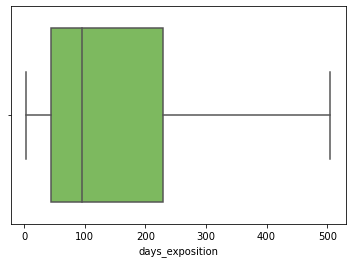

In [170]:
colors = ['#78C850']
sns.boxplot(x= data.days_exposition, showfliers=False, palette=colors);

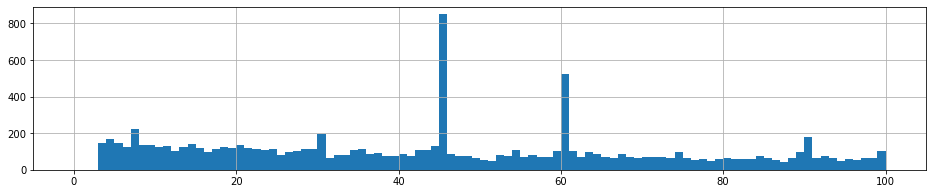

In [171]:
data['days_exposition'].hist(range=(0,100),figsize=(16,3), bins=100);

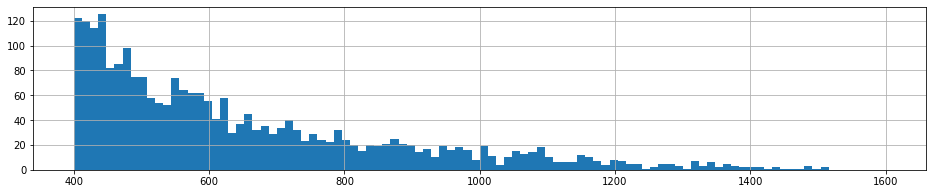

In [172]:
data['days_exposition'].hist(range=(400,1600),figsize=(16,3), bins=100);

In [173]:
print('Медиана =', data['days_exposition'].median())
print('Средняя =', data['days_exposition'].mean())

Медиана = 95.0
Средняя = 179.13851524797207


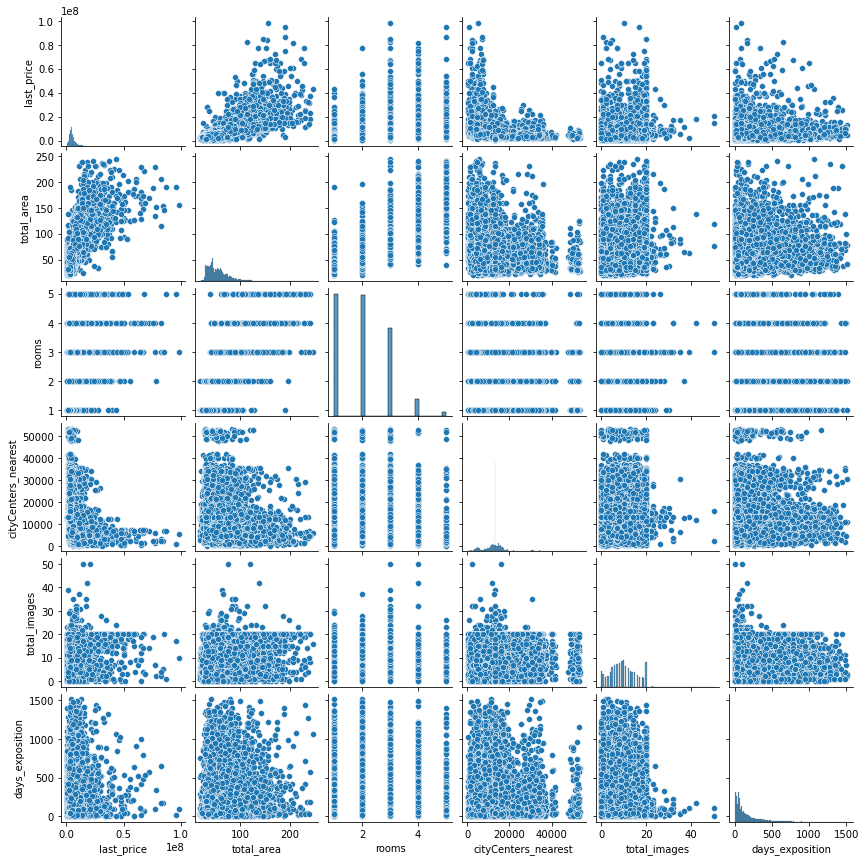

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'total_images','days_exposition']])
plt.gcf().set_size_inches(12,12);

<AxesSubplot:xlabel='last_price'>

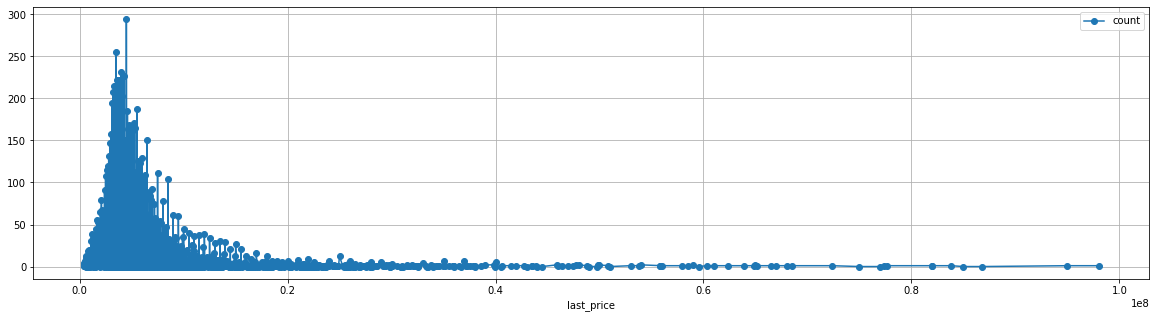

In [175]:
d_y = data.groupby('last_price')['days_exposition'].agg({'count'})
d_y.plot(style='o-', figsize=(20,5), grid=True)

Исходя из срока размещения по сумме, можно сказать, что, есть квартиры до 10 млн продавались максимально долго

<AxesSubplot:xlabel='rooms'>

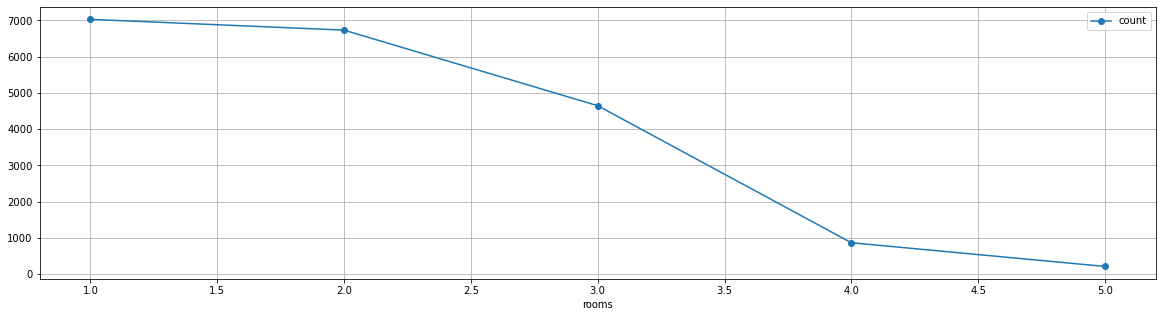

In [176]:
d_y = data.groupby('rooms')['days_exposition'].agg({'count'})
d_y.plot(style='o-', figsize=(20,5), grid=True)

Можно сказать, что квартиры с 1 и 2 комнатами продавались дольше всего

<AxesSubplot:xlabel='total_images'>

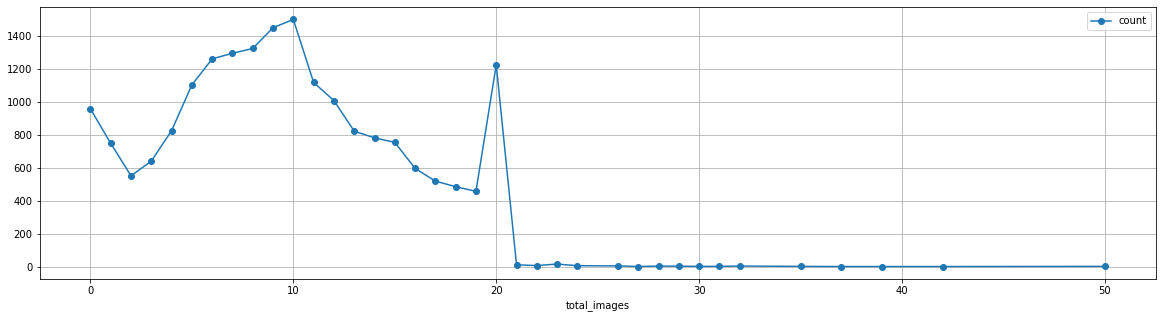

In [177]:
d_y = data.groupby('total_images')['days_exposition'].agg({'count'})
d_y.plot(style='o-', figsize=(20,5), grid=True)

Число фотографий в квартире было максимально в значении 10

<AxesSubplot:xlabel='total_area'>

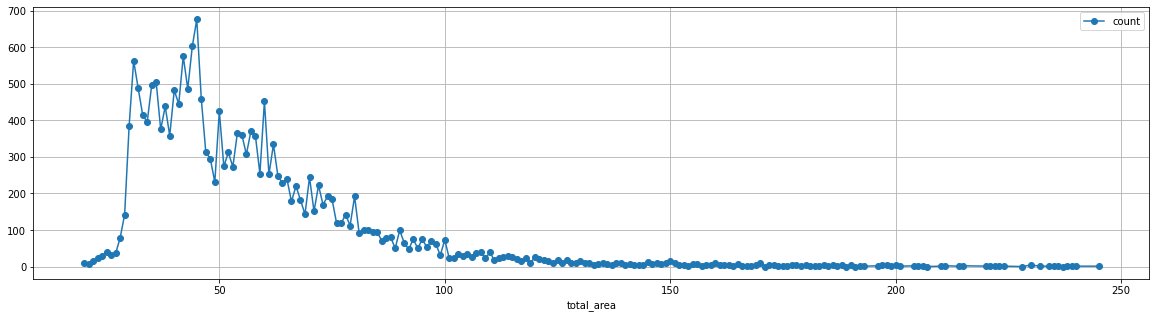

In [178]:
d_y = data.groupby('total_area')['days_exposition'].agg({'count'})
d_y.plot(style='o-', figsize=(20,5), grid=True)

Срок размещения от общей площади, можно сказать, что квартиры с 40 кв.м. продавались дольше всего

### Вывод:
Медианное время продажи - 103 дня. Среднее время продажи - 186 день.
Из приведенных значений можно сделать вывод, что продажа квартиры занимает от 3 до 6 месяцев. Все что продается раньше 40 дней можно назвать быстрой продажей. Необычайно долгие продажи начинаются от 2 лет.

##### Изучим редкие и выбивающиеся значения

Изучим зависимость Цены от Площади

Корелляция цены от total_area 0.7300141964622022


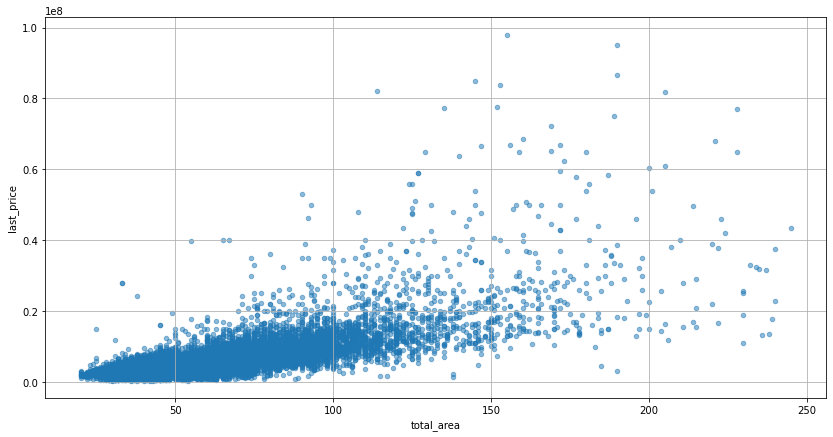

In [179]:
def corr1(column):
    print('Корелляция цены от',column , data['last_price'].corr(data[column]))
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);

corr1('total_area')

Из графика видно , что зависимость цены от площади есть, но она не такая уж сильная. При возрастании площади и цена возрастает, но популярнее квартиры от 25 до 100 м. Более 150 зависимость рассеевается.

In [180]:
data['last_price'].corr(data['total_area'])

0.7300141964622022

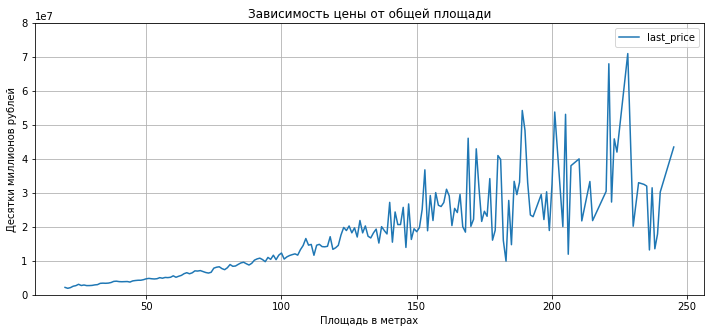

In [181]:
(data
 .pivot_table(index='total_area', values='last_price')
 .plot(grid=True,ylim=(0, 80000000), figsize=(12,5))
).set_title('Зависимость цены от общей площади')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Площадь в метрах')
plt.show()

Изучим зависимость Цены и Жилой площади

Корелляция цены от living_area 0.6007938374891539


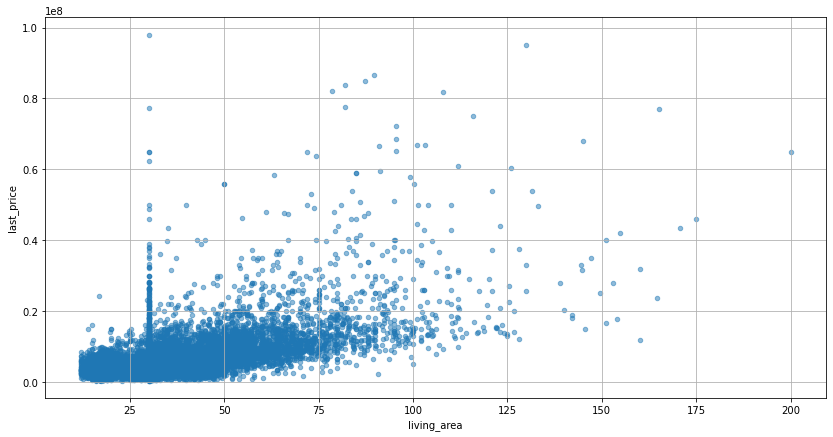

In [182]:
def corr1(column):
    print('Корелляция цены от',column , data['last_price'].corr(data[column]))
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);

corr1('living_area')

Из графика видно , что зависимость цены от жилой площади есть, но она не такая уж сильная. При возрастании жилой площади площади и цена возрастает. Цена корелляции 0.60.

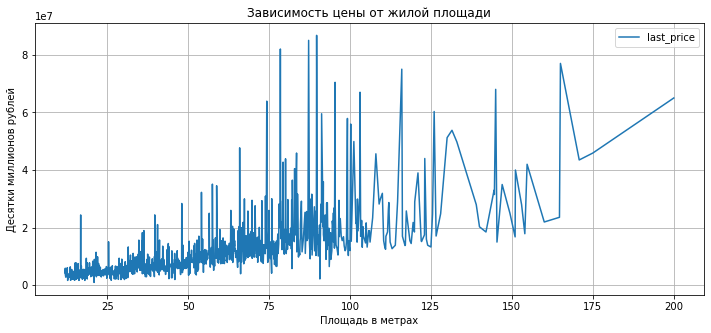

In [183]:
(data
 .pivot_table(index='living_area', values='last_price')
 .plot(grid=True, figsize=(12,5))
).set_title('Зависимость цены от жилой площади')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Площадь в метрах')
plt.show()

Максимальные значения цены жилой площади около 90 м.

Изучим зависимость Цены от Площади кухни

Корелляция цены от kitchen_area 0.4777988734829941


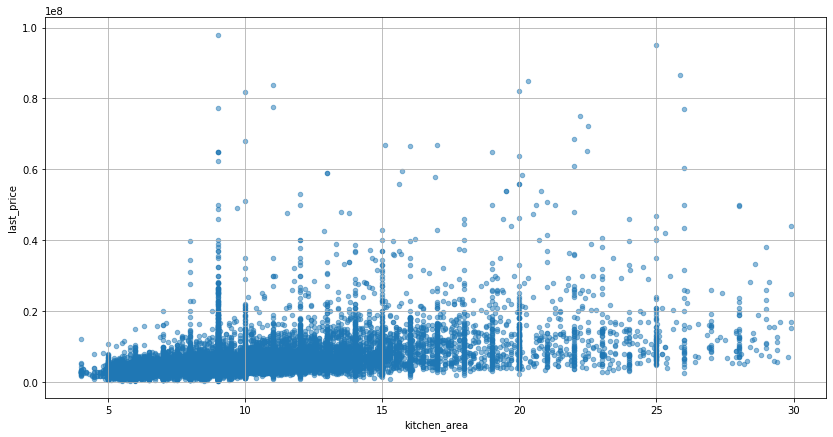

In [184]:
def corr1(column):
    print('Корелляция цены от',column , data['last_price'].corr(data[column]))
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);

corr1('kitchen_area')

Из графика видно , что зависимость цены от площади кухни есть. Максимально видно от 5 до 19. Корелляция 0.47

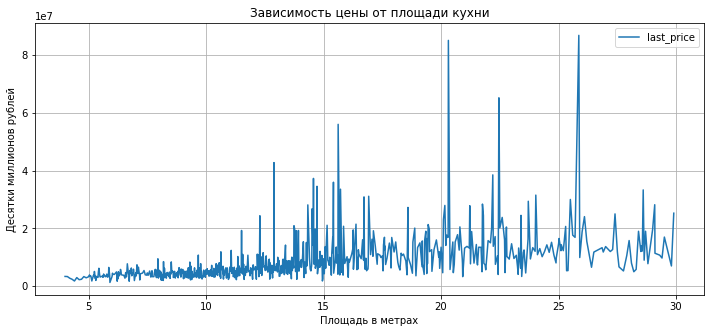

In [185]:
(data
 .pivot_table(index='kitchen_area', values='last_price')
 .plot(grid=True, figsize=(12,5))
).set_title('Зависимость цены от площади кухни')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Площадь в метрах')
plt.show()

Самые высокие показатели цены  площади кухни, примерно 22 м  и 26 м.

Изучим зависимость цены от количества комнат

Корелляция цены от rooms 0.42705935831564623


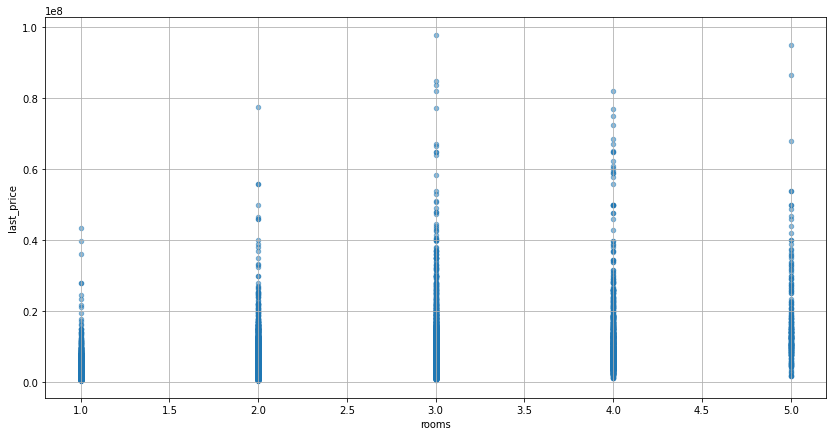

In [186]:
corr1('rooms')

Из графика видно , что зависимость цены от кол-ва комнат слабо прослеживается. Есть выраженные выбросы 3 комнаты и 4.

In [187]:
data['last_price'].corr(data['rooms'])

0.42705935831564623

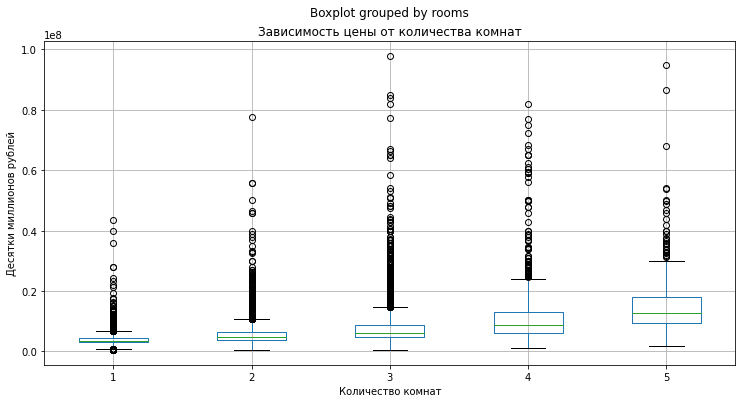

In [188]:
(data
 .boxplot('last_price', by='rooms', figsize=(12,6))).set_title('Зависимость цены от количества комнат')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Количество комнат')
plt.show()

Чем больше комнат, тем цена и возрастает.

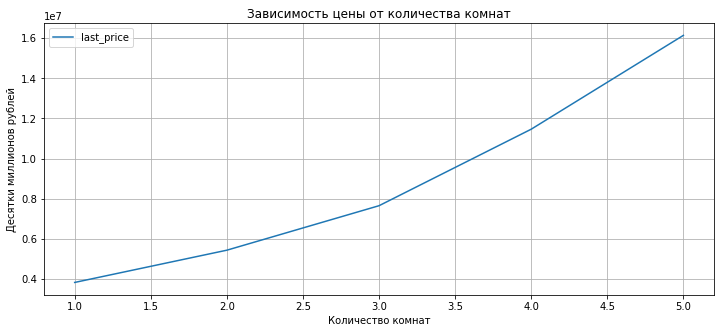

In [189]:
(data
 .pivot_table(index='rooms', values='last_price')
 .plot(grid=True, figsize=(12,5))
).set_title('Зависимость цены от количества комнат')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Количество комнат')
plt.show()

На графиках видим, что цена зависит от количества комнат. Но всё же, скорее всего, эта зависимость косвенная. Является следствием увеличения общей площади.

Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

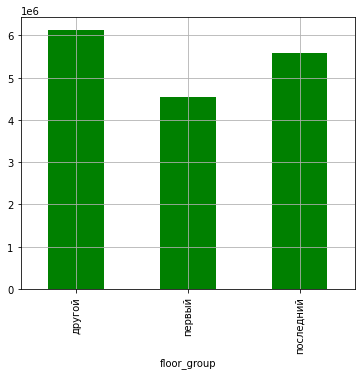

In [190]:
#Вычислим среднюю цену в каждой категории
cat_fl_mean = data.groupby('floor_group')['last_price'].mean();
cat_fl_mean.plot(x=cat_fl_mean.index, y=cat_fl_mean.values, kind='bar', color = 'green', grid=True, figsize=(6,5));

Гистограмма четко показывает - первый этаж любят меньше всего - поэтому средняя цена ниже всех(чем меньше спрос, тем меньше цена). Более предпочтителен другой этаж - не первый и не последний - на него цена выше.

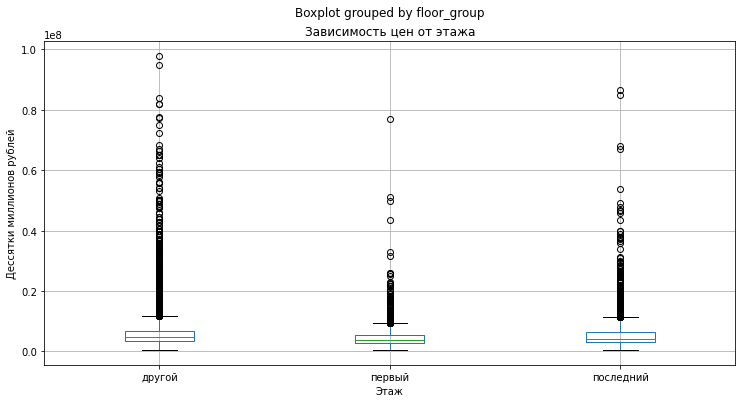

In [191]:
(data
 .boxplot('last_price', by='floor_group', figsize=(12,6))).set_title('Зависимость цен от этажа')
plt.ylabel('Дессятки миллионов рублей')
plt.xlabel('Этаж')
plt.show()

Другой и последний самые дорогие.

Изучим зависимость цены от даты размещения (день недели, месяц, год)

Корелляция цены от weekday -0.00545329700636577
Корелляция цены от month 0.014967559251568658
Корелляция цены от year -0.052541381656875275


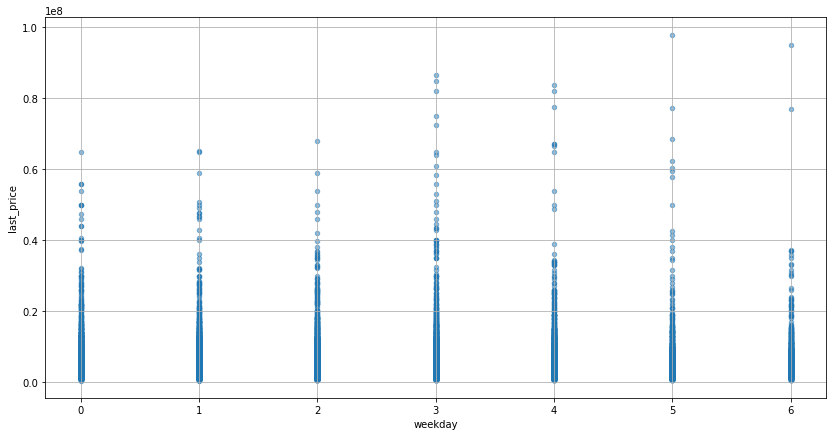

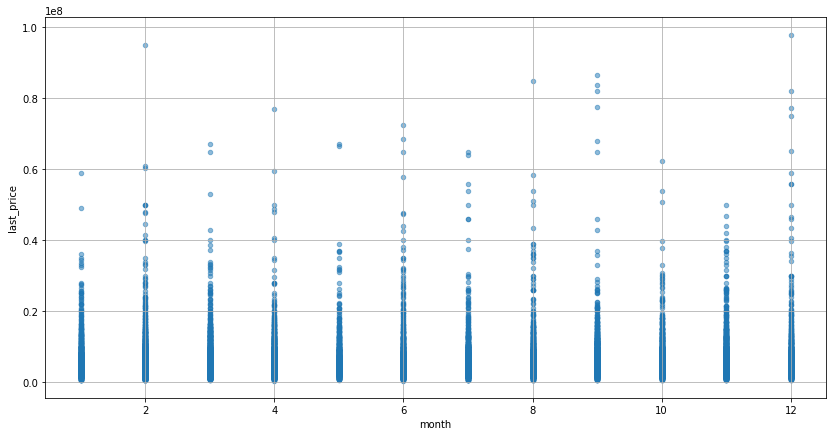

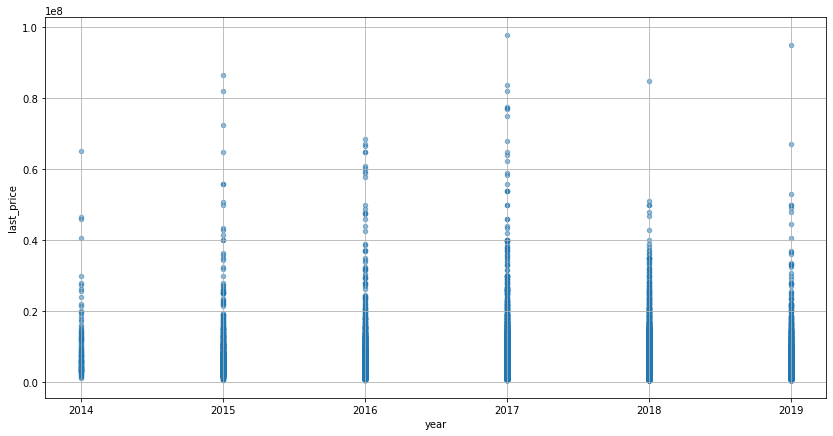

In [192]:
corr1('weekday')
corr1('month')
corr1('year')

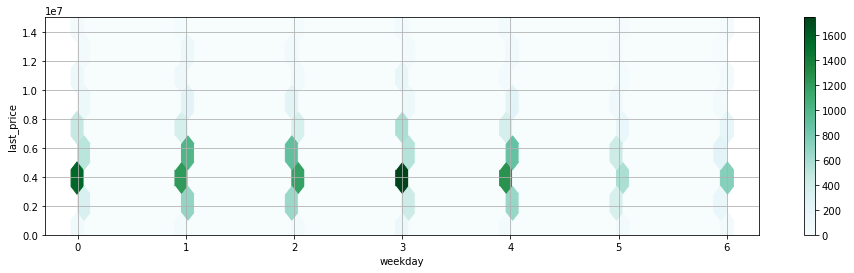

In [193]:
data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000));

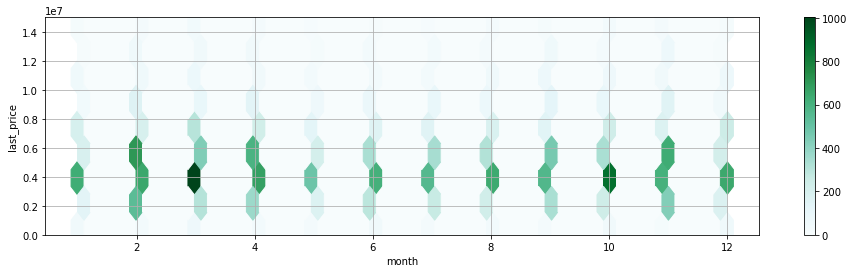

In [194]:
data.plot(x='month', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000));

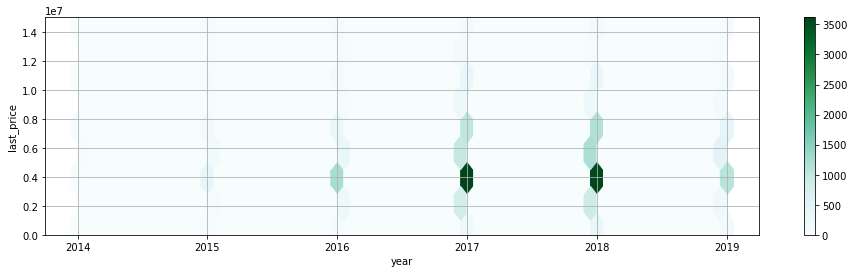

In [195]:
data.plot(x='year', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000));

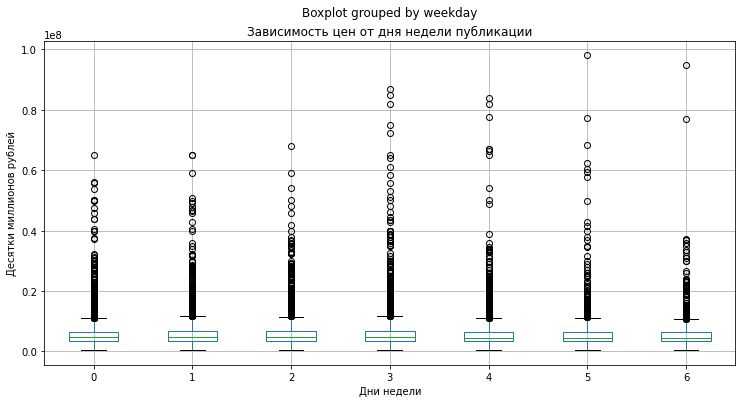

In [196]:
(data
 .boxplot('last_price', by='weekday', figsize=(12,6))).set_title('Зависимость цен от дня недели публикации')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Дни недели')
plt.show()

Явных зависимостей нет, можно сказать, что в воскресенье цена немного меньше, чем остальные. В четверг есть более выраженные показатели динамики.

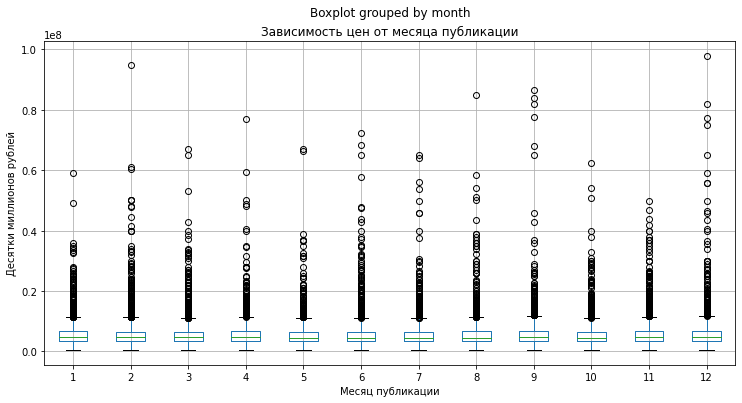

In [197]:
data.boxplot('last_price', by='month', figsize=(12,6)).set_title('Зависимость цен от месяца публикации')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Месяц публикации')
plt.show()

В зависимости от месяца, тоже явных выбросов нет, можно сказать, что в декабре и сентябре бывают наибольшие показатели стоимости.


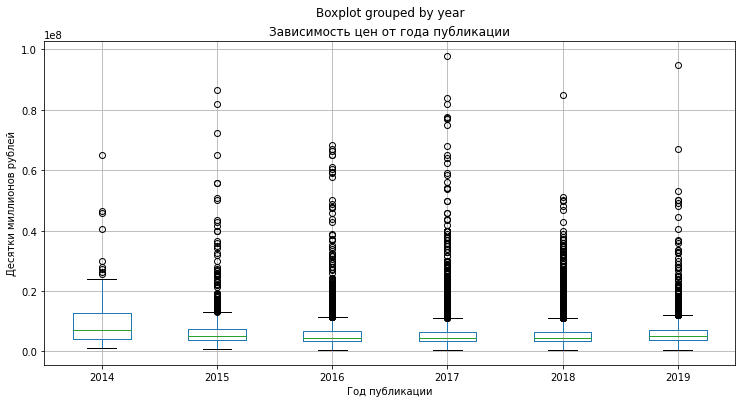

In [198]:
data.boxplot('last_price', by='year', figsize=(12,6)).set_title('Зависимость цен от года публикации')
plt.ylabel('Десятки миллионов рублей')
plt.xlabel('Год публикации')
plt.show()

В зависимости по годам, можно сказать, что в 2014 цены были ниже, а в 2017 году цены значительно имели показатели роста.

In [199]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,452.00","22,452.00","22,452.00","19,478.00","22,452.00","22,452.00","22,452.00","22,452.00","22,452.00"
min,1.00,20.00,2.00,3.00,"430,000.00",12.00,4.00,1.00,1.00
max,5.00,245.00,8.30,"1,513.00","98,000,000.00",200.00,29.90,33.00,35.00


#### Сравнение средней стоимости цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [200]:
loc10 = data.groupby('locality_name')['metr_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
loc10.columns = ['flats', 'metr_price']
loc10.reset_index(inplace=True)

In [201]:
print(loc10)
print()
print('ВЫВОД:')
print('Населённый пункт, где cамая низкая стоимость жилья')
print(loc10.loc[loc10['metr_price']==loc10['metr_price'].min()])
print()
print('Населённый пункт, где cамая высокая стоимость жилья')
print(loc10.loc[loc10['metr_price']==loc10['metr_price'].max()])

       locality_name  flats     metr_price
0    Санкт-Петербург  14897  112571.680473
1     поселок Мурино    517   85383.251451
2     поселок Шушары    426   78423.582160
3         Всеволожск    388   68796.417526
4             Пушкин    354  102964.884181
5            Колпино    337   75644.335312
6            Гатчина    306   68976.359477
7  поселок Парголово    284   93373.778169
8    деревня Кудрово    280   92900.907143
9             Выборг    232   57790.745690

ВЫВОД:
Населённый пункт, где cамая низкая стоимость жилья
  locality_name  flats   metr_price
9        Выборг    232  57790.74569

Населённый пункт, где cамая высокая стоимость жилья
     locality_name  flats     metr_price
0  Санкт-Петербург  14897  112571.680473


При cравнении средней стоимости цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений, можно сказать, что в Выборге самая низкая стоимость жилья-57790, а самая высокая стоимость в Санкт-Петербурге-112571.

#### Определим границу центральной зоны

In [202]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_group,floor_group_cat,city_centers_km
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.000000,<NA>,120370,3,3,2019,другой,3,16.0
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,False,...,0,522.671353,81,83750,1,12,2018,первый,1,19.0
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.000000,558,92785,3,8,2015,другой,3,14.0
3,0,64900000,159,2015-07-24,3,2.65,14,30.0,9,False,...,3,234.000000,424,408176,4,7,2015,другой,3,7.0
4,10,2890000,30,2018-09-10,1,2.65,12,14.4,5,False,...,0,522.671353,55,96333,0,9,2018,другой,3,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,9,9700000,133,2017-03-21,3,3.70,5,73.3,3,False,...,3,381.000000,<NA>,72932,1,3,2017,другой,3,4.0
22450,14,3100000,59,2018-01-15,3,2.65,5,38.0,4,False,...,0,522.671353,45,52542,0,1,2018,другой,3,13.0
22451,18,2500000,56,2018-02-11,2,2.65,3,29.7,1,False,...,0,522.671353,<NA>,44642,6,2,2018,первый,1,13.0
22452,13,11475000,76,2017-03-28,2,3.00,17,30.0,12,False,...,3,196.000000,602,150986,1,3,2017,другой,3,10.0


In [203]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='metr_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('metr_price', ascending=False)

,metr_price
locality_name,
Санкт-Петербург,112571
Пушкин,102964
поселок Парголово,93373
деревня Кудрово,92900
поселок Мурино,85383
поселок Шушары,78423
Колпино,75644
Гатчина,68976
Всеволожск,68796


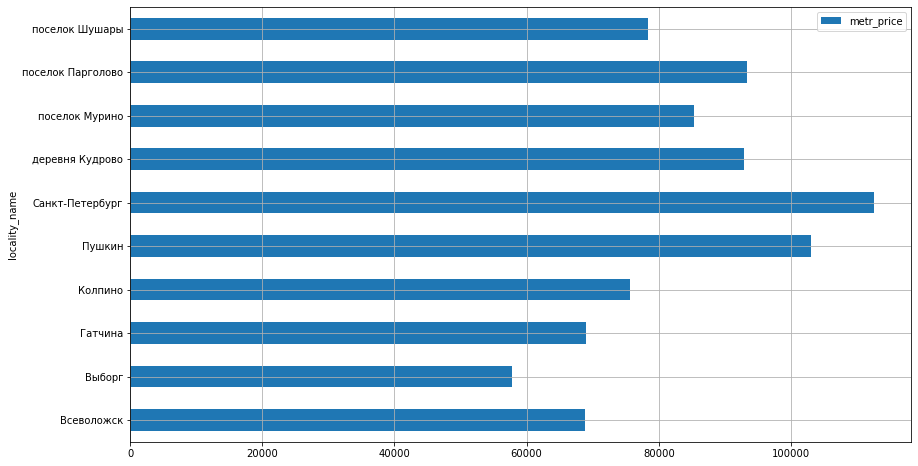

In [204]:
city_sm_price.plot(kind='barh', grid=True, figsize=(14,8));

Средняя стоимость жилья cамая высокая  в Санкт-Петербурге -	112571.

Средняя стоимость жилья cамая cамая низкая стоимость жилья в Выборге -	57790.


In [205]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

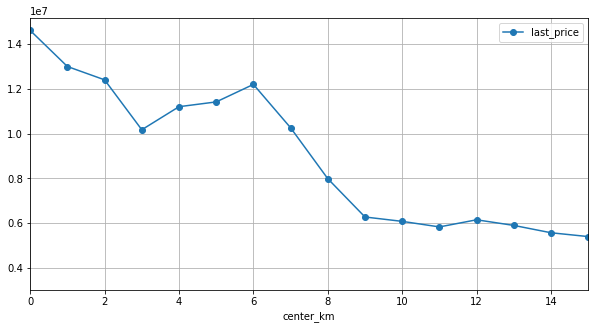

In [206]:
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

Центральная зона - это 6 км и меньше. Дальше 6 км средняя цена на квартиры резко снижается.

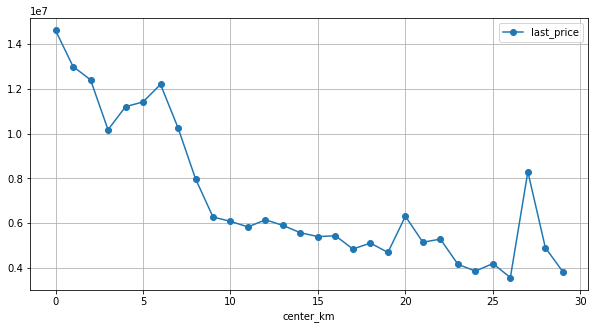

In [207]:
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

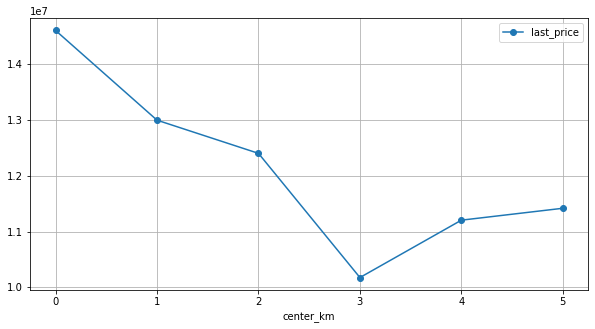

In [208]:
(
    data.query('locality_name == "Санкт-Петербург" and center_km < 6')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

In [209]:
city_spb_price = data.query('locality_name == "Санкт-Петербург" and last_price == 10000000 and center_km < 6') \
.pivot_table(values='metr_price', index='center_km')
city_spb_price = city_spb_price.astype(int)
city_spb_price.sort_values('metr_price', ascending=False)

,metr_price
center_km,
1,165437
5,139423
4,119837
3,112949
2,112573
0,100000


Исследуя среднюю цену в Санкт-Петербурге равной стоимостью, можно сказать, что самая дорогая цена в радиусе 1 км = 165437, самой маленькой приходиться значение в 0 км. Различаю может служить разный фактор квартир - это зависит в первую очередь от ремонта, кол-ва комнат кол-ва владельцев и многих футоры которые индивидуальны при продаже той или иной квартиры.

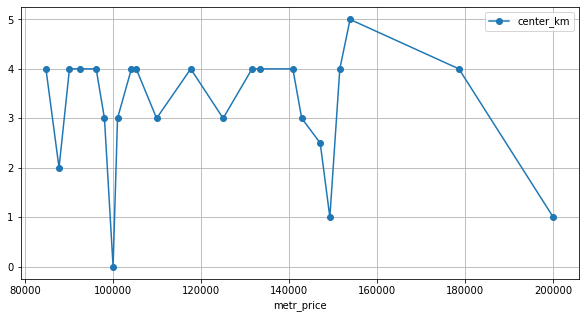

In [210]:
(
    data.query('locality_name == "Санкт-Петербург" and last_price == 10000000 and center_km < 6')
    .pivot_table(index='metr_price', values='center_km')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

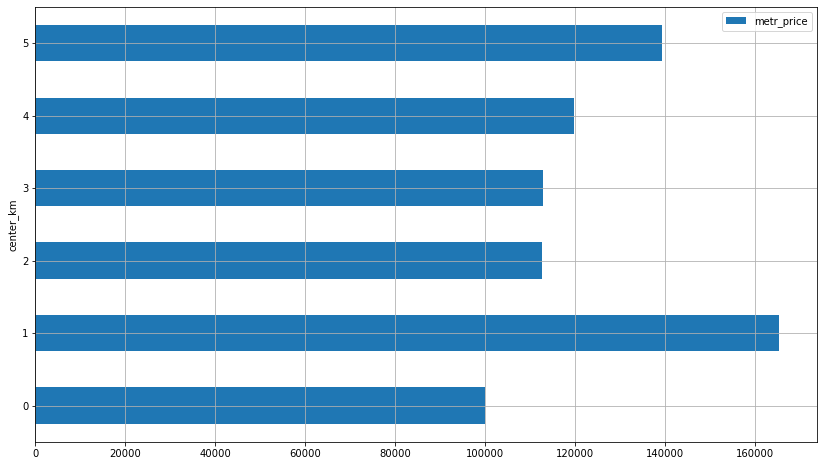

In [211]:
city_spb_price.plot(kind='barh', grid=True, figsize=(14,8));

### Общий вывод

Проведя анализ графика, можно сказать, что популярнее всего квартиры, с площадью, от 30 до 60, что, логично исходя анализу рынка, рентабельней и практичней. Проще продать-купить. Но есть и выбросы, можно сказать, что квартиры больше 100 считаются "элитным жильем".
Проведя анализ зависимости цены от общей площади, можно сказать, что, чаще всего встречаются квартиры от 30 до 100 м.

Жилая площадь — суммарное значение квадратных метров всех помещений объекта недвижимости, пригодных для жизни. Стандартный минимальный метраж — 18 кв. м на 1 человека. Согласно исследованию, имеются квартиры менее 25 м, что скорее всего свидетельствует - это студии. Популярнее значения от 30 до 55.
Проведя анализ зависимости цены от жилой площади, можно сказать, что, чаще всего встречаются квартиры от 20 до 80 м.

Из анализа площади кухни, можно сказать, что значения от 7 до 13 являются стандартами показателями, т.к. площади кухни установлен минимум 4м.
Проведя анализ зависимости цены площади кухни, можно сказать, что, чаще всего встречаются квартиры с кухней от 6 до 25 м, соответственно, чем больше площадь кухни, тем цена встречается и больше.

Можно сделать вывод, что больше всего квартир продаются по цене в диапазоне 1,8-8 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн. А в остальных случаях чем ниже и чем выше цена интерес пропорционально падает.

Исходя из графика, видно, что самые популярные квартиры - 1-комнатные и 2-комнатные(около 8000 квартир). 3-комнатные квартиры встречаются около 5500 раз, но, а квартиры от 4-комнат встречаются не более 1000 раз.
Проведя анализ зависимости цены и кол-ва комнат, можно сказать, что, в цене квартиры с комнатами 3 и 4. Но и с 5 и 2 комнатами есть выбросы(все зависит от ремонта и класса жилья).


Исходя из анализа, можно сказать, что популярней квартиры с 1 по 6(встречается около 14000), от 6 до 10, тоже довольно часто(около 5000), но реже всего этажи выше 10.

Из анализа типа этажа квартиры, можно сказать, что популярнее всего значение другой(более 16000), первый (около 2000), а последний (около 3000).
Проведя анализ зависимости цены и типа этажа, можно сказать, что, в цене квартиры с категорией "другой". Последний этаж тоже в цене, но первый менее всего.

Исходя из анализа, можно сказать, что чаще встречаются дома от 5 до 12 этажей. Самый максимальное значение примерно 9 этажей(Более 7000). От 1 до 5 встречается не более 2000. От 12 до 28 встречается не более 2300. Но есть и выбивающие значения - от 32 до 36.
Исходя из анализа, можно сказать, что максимальное значение примерно от 9000 м до 14000 м до центра города (около 12000), реже встречаются значения от 14000 м до 20000 м (около 6000). Расстояние до центра города более 20000 м встречается не более 1500.

Исходя из анализа расстояния до ближайшего аэропорта, можно сказать, что максимальное значение встречается от 25000 м до 30000 м (около 8000). Так же расстояние от 11000 м до 25000 м встречается около 3000 квартир. Расстояние от 30000 м идет на понижение и не более 2500 квартир. Расстояние от 6000 м до 11000 м встречается не более 1000 квартир.

При изучении расстояния до ближайшего парка, можно сказать, что максимальное число квартир приходится в диапазоне от 400 до 500 м (около 16000 квартир). Остальные значения расстояния до ближайшего парка не более 2000.

Максимальное значение приходится от 2 до 3 метров (около 18000 квартир). Что согласно нормам-логично (не менее 2,7 м). Остальная высота потолков более 3 метров, можно предположить, что это элитное жилье или старые постройки.

Исходя из анализа, можно сказать, что максимальное значение приходится на будни (значения около 4000). В выходные дни публикаций не более 2000.
Проведя анализ зависимости цены и дня публикации, можно сказать, что, ярко выраженная динамика видна в четверг. В воскресенье виден выброс цены в минимальные значения по соотношению других дней, но есть и выбросы. Точно сказать зависимость невозможно.

Исходя из анализа, можно сказать, что чаще всего квартиры продаются в феврале, марте и апреле, и ноябре (от 2000 до 2500 квартир). Наименьшими по продаже квартир являются месяца: январь, май, декабрь (не более 1500 квартир). Июнь, июль, август, сентябрь, ноябрь продаются не более 1600 квартир.
Проведя анализ зависимости цены и месяца публикации, сказать о явных преимуществах невозможно. Думаю, согласно логике, в декабре у многих годовые и премии, и цены поэтому варьируются больше.

Исследуя год публикации, можно сказать, что пиковым значением является 2017 и 2018 год (около 8000 квартир). Остальные года публикации, не более 3000 квартир.

Проведя анализ зависимости цены и года публикации, можно сказать, что в 2016 и 2017 году есть выраженные показатели роста цены.
При сравнении средней стоимости цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений, можно сказать, что в Выборге самая низкая стоимость жилья-57790, а самая высокая стоимость в Санкт-Петербурге-112571.

Исследуя среднюю цену в Санкт-Петербурге равной стоимостью, можно сказать, что самая дорогая цена в радиусе 1 км = 165437, самой маленькой приходиться значение в 0 км. Различаю может служить разный фактор квартир - это зависит в первую очередь от ремонта, кол-ва комнат кол-ва владельцев и многих футоры которые индивидуальны при продаже той или иной квартиры.




In [212]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

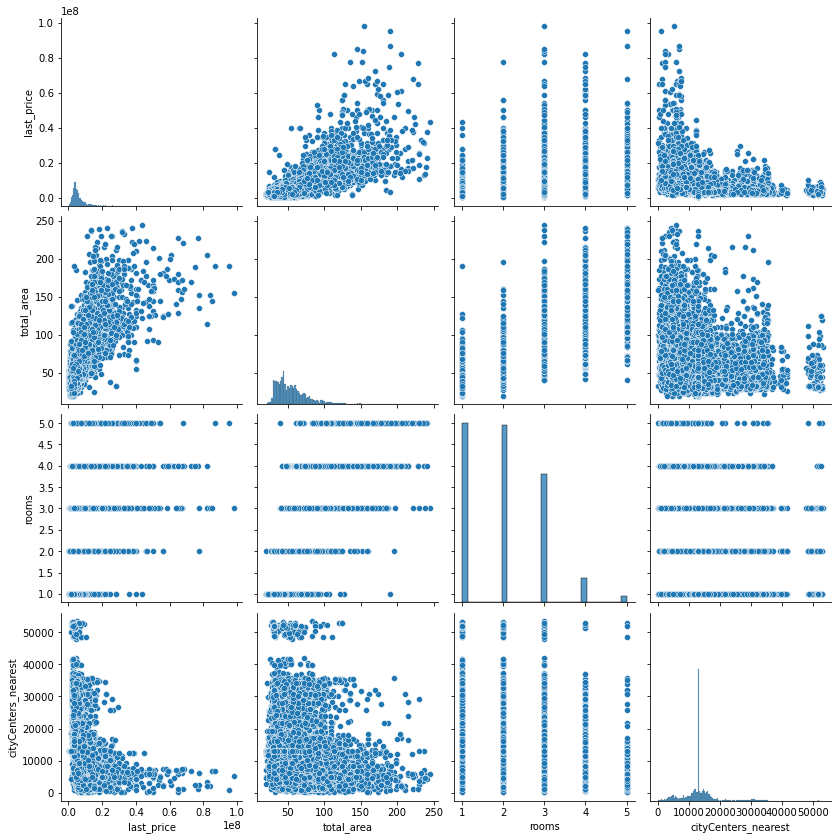

In [213]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


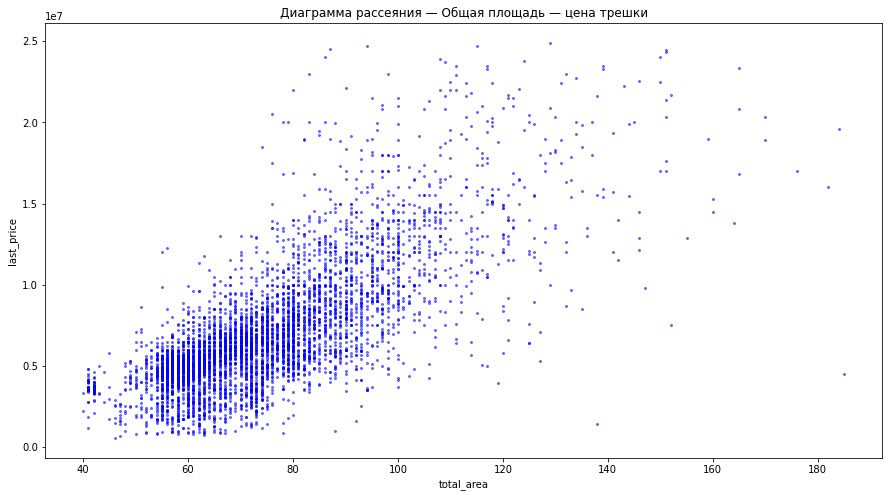

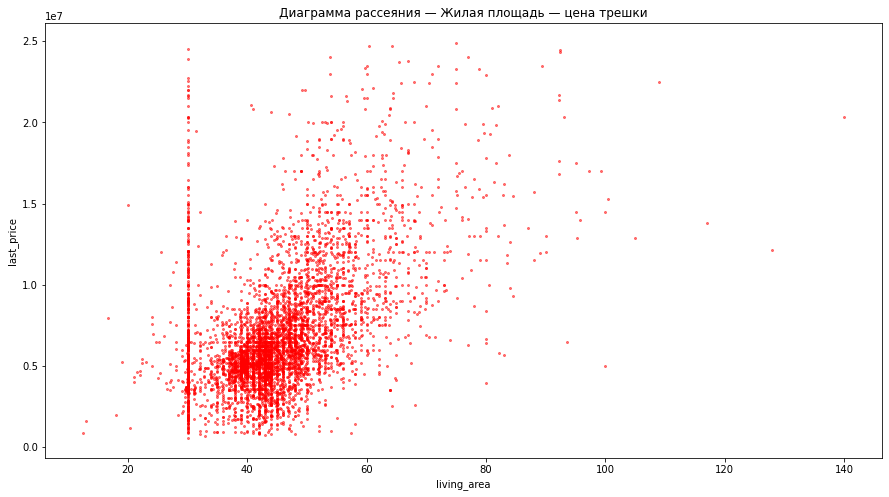

In [214]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

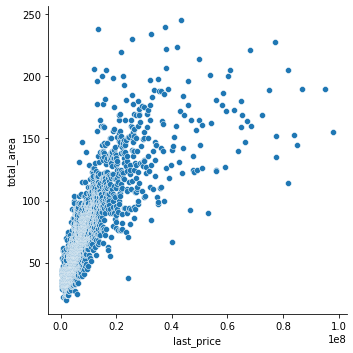

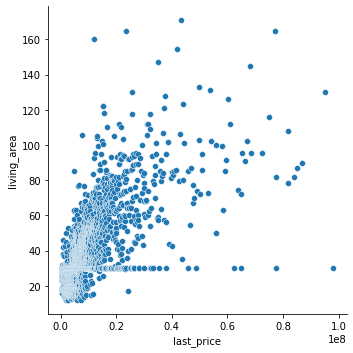

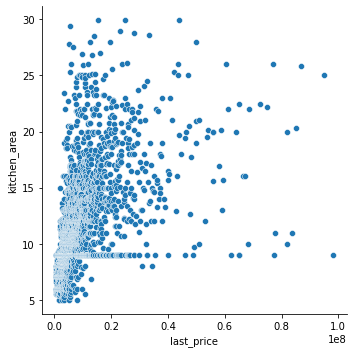

In [215]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод